# Agriculture Activity Dataset

#### Downloading the required packages.

In [1]:
library(tidyverse)
library(visdat)
library(readr)
library(skimr)
library(magrittr)
library(purrr) 
library(glue)
library(stringr)
library(rvest)
library(httr)
library(jsonlite)
library(XML)
library(xml2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten




#### Creating functions to get data using API(s)

In [2]:
# A function to get data from the Ministry for the Environment database API

get_data_from_mfe <- function(api_key, data_id){
    
    query <- glue('https://data.mfe.govt.nz/services;key={api_key}/wfs?service=WFS&version=2.0.0&request=GetFeature&typeNames={data_id}') # creates a query url using inputs of api key and data-id number available on MfE website
    
    api_response <- GET(query) #gets the API response from the query
    
    data_xml <- read_xml(api_response) #reads the xml data from the api response
    
    data_parsed <- xmlParse(data_xml) #parses the data into an xml format that is readable in R
    
    data_df <- glue('//data.mfe.govt.nz:{data_id}') %>%  # creating a node name to look for
    getNodeSet(data_parsed, .)  %>%  # looking at nodes with the name
    xmlToDataFrame(nodes = .) #turns the data within the given node into a data frame
    
    return(data_df) #returns the data frame
}

ERROR: Error in eval(expr, envir, enclos): object 'data_df' not found


#### Reading all the dataset in a csv format 

In [3]:
horti_info <- read_csv("https://raw.githubusercontent.com/beuri97/data201_gp/agri-activity/data/hort_data_info.csv")

New names:
• `` -> `...2`
• `` -> `...3`
Rows: 9 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Legend/Légende, ...2, ...3

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
horti_pop <- read_csv("https://raw.githubusercontent.com/beuri97/data201_gp/agri-activity/data/hort_pop_regional.csv")

Rows: 1447 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Horticulture, Area, Year, Flags
dbl (1): Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
livestock_info <- read_csv("https://raw.githubusercontent.com/beuri97/data201_gp/agri-activity/data/livestock_data_info.csv")

New names:
• `` -> `...2`
• `` -> `...3`
Rows: 9 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Legend/Légende, ...2, ...3

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
livestock_pop <- read_csv("https://raw.githubusercontent.com/beuri97/data201_gp/agri-activity/data/livestock_pop_regional.csv")

Rows: 4231 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Livestock, Area, Year, Flags
dbl (1): Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


###  Visualization of any missing values in our datasets

The **vis_miss()** function returns at a glance of any missing values inside the dataframe.

The **vis_dat()** Returns a color coordinated ggplot according to its classes (elements) and if any missing values are present

#### For horti_info dataset

Warning message:
“`gather_()` was deprecated in tidyr 1.2.0.
Please use `gather()` instead.”


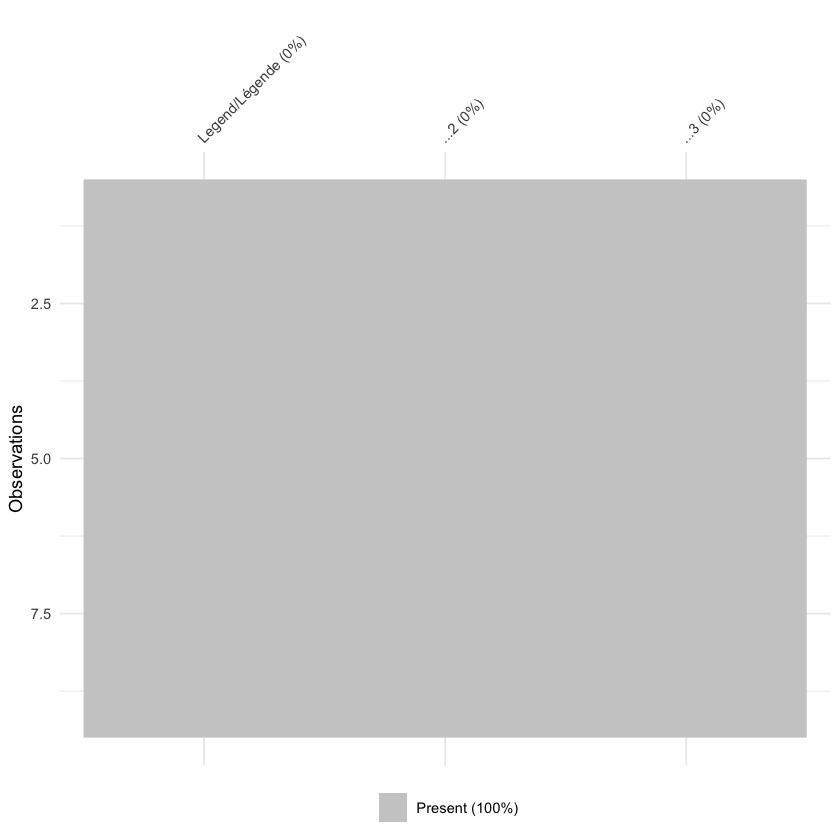

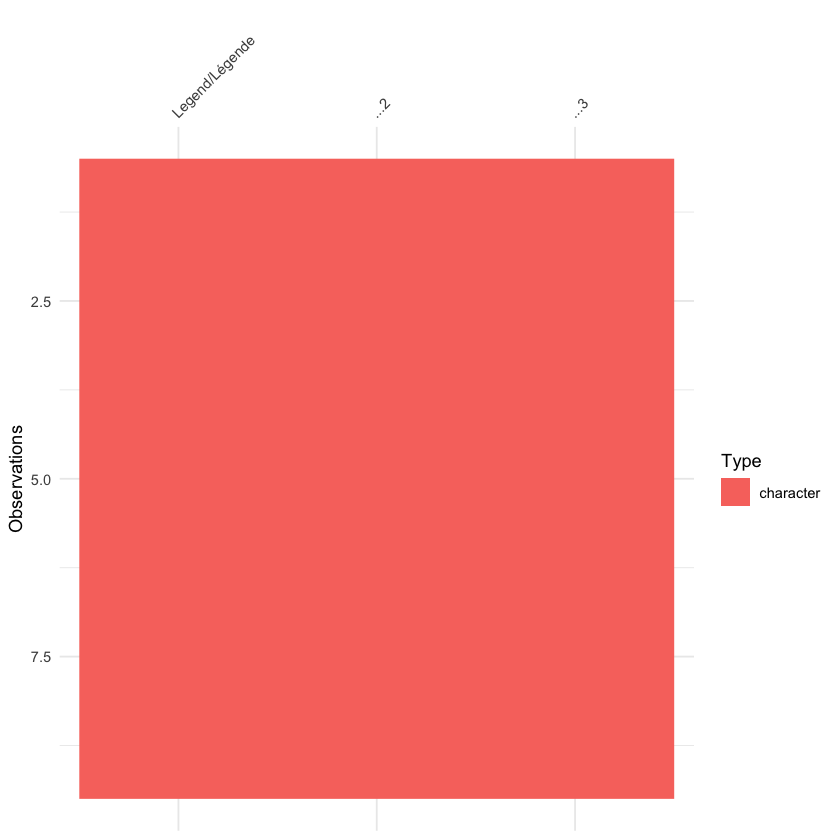

In [7]:
vis_miss(horti_info)   # return any missing values inside the dataframe
vis_dat(horti_info)    # returns color coordinated ggplot according to its classes (elements) and if any missing values are present

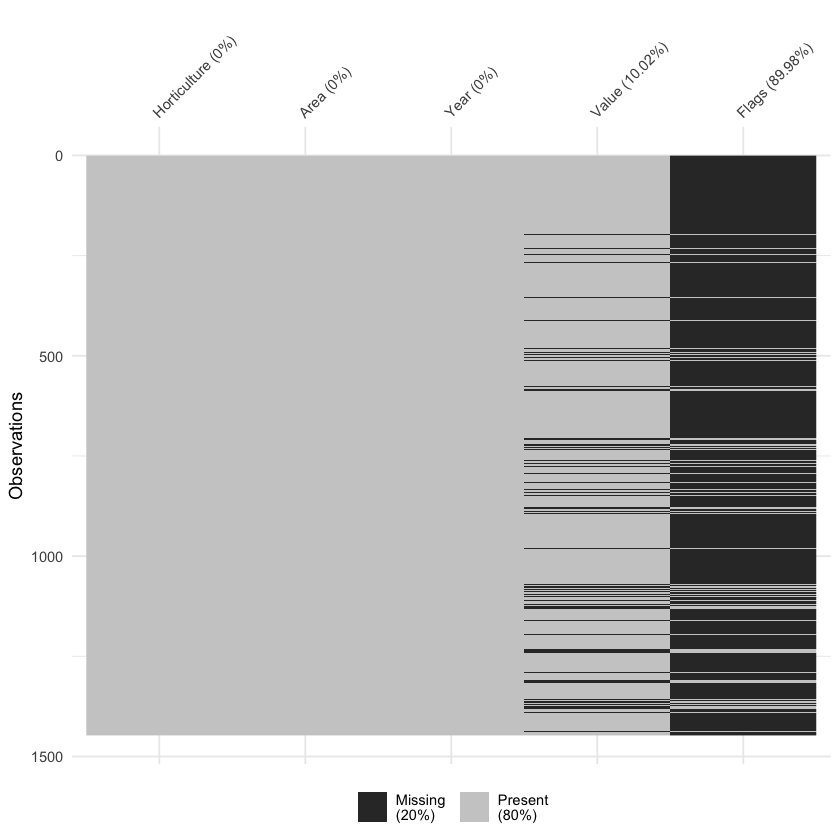

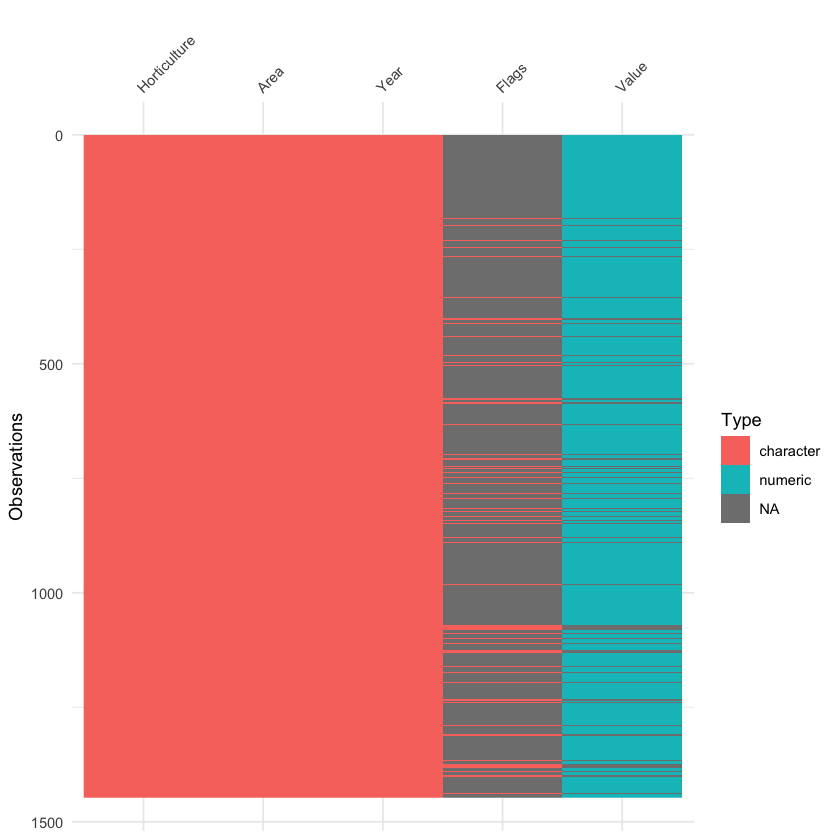

In [8]:
vis_miss(horti_pop) # return any missing values inside the dataframe
vis_dat(horti_pop)  # returns color coordinated ggplot according to its classes (elements) and if any missing values are present

#### For livestock_info dataset

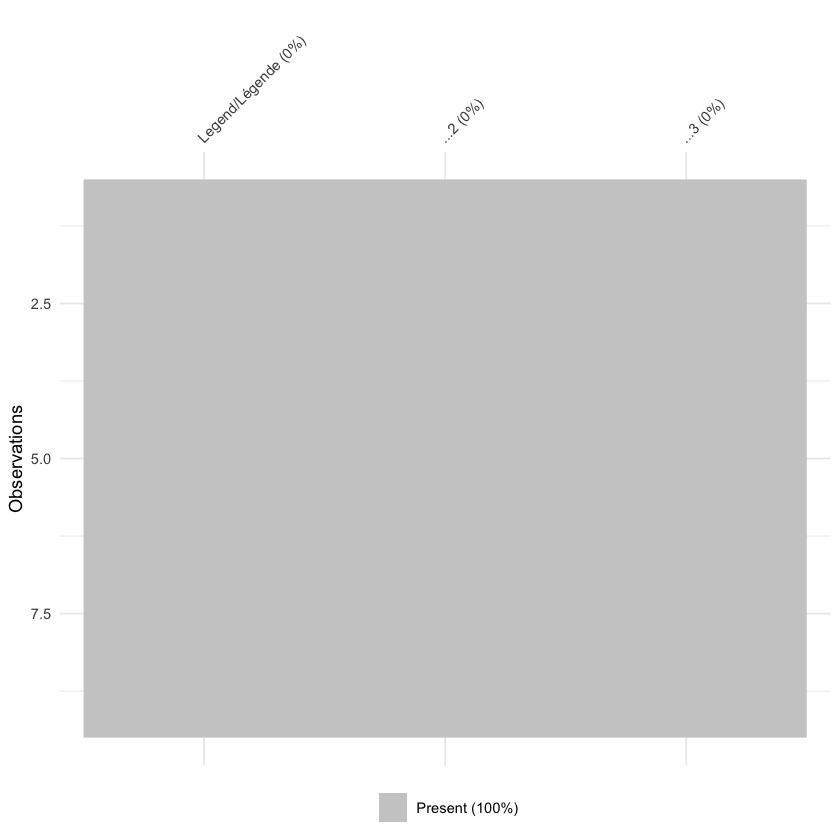

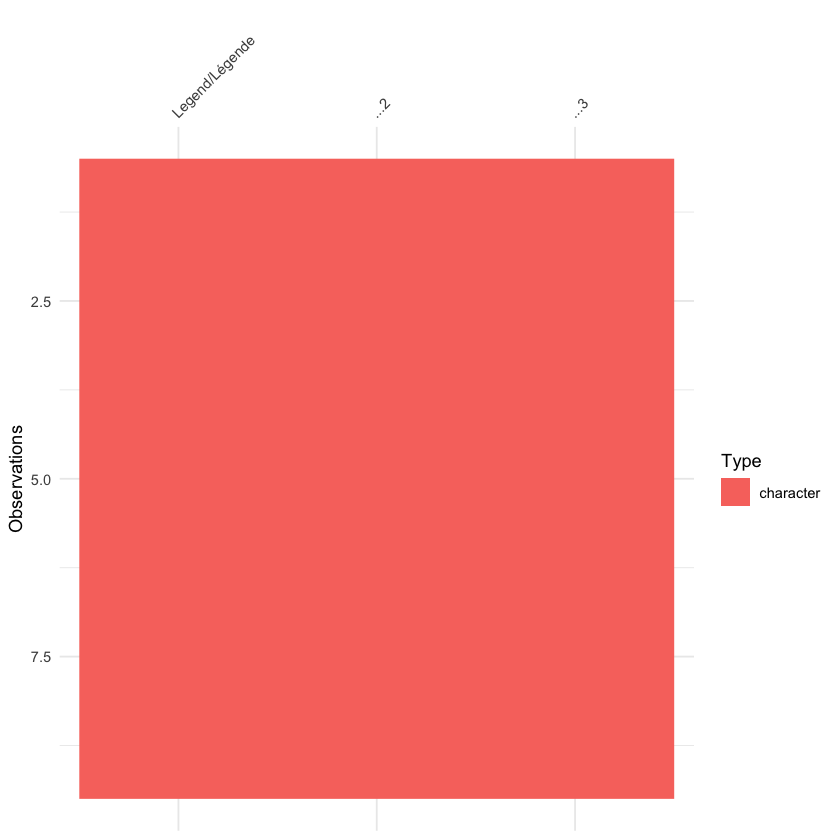

In [9]:
vis_miss(livestock_info) # return any missing values inside the dataframe
vis_dat(livestock_info)  # returns color coordinated ggplot according to its classes (elements) and if any missing values are present

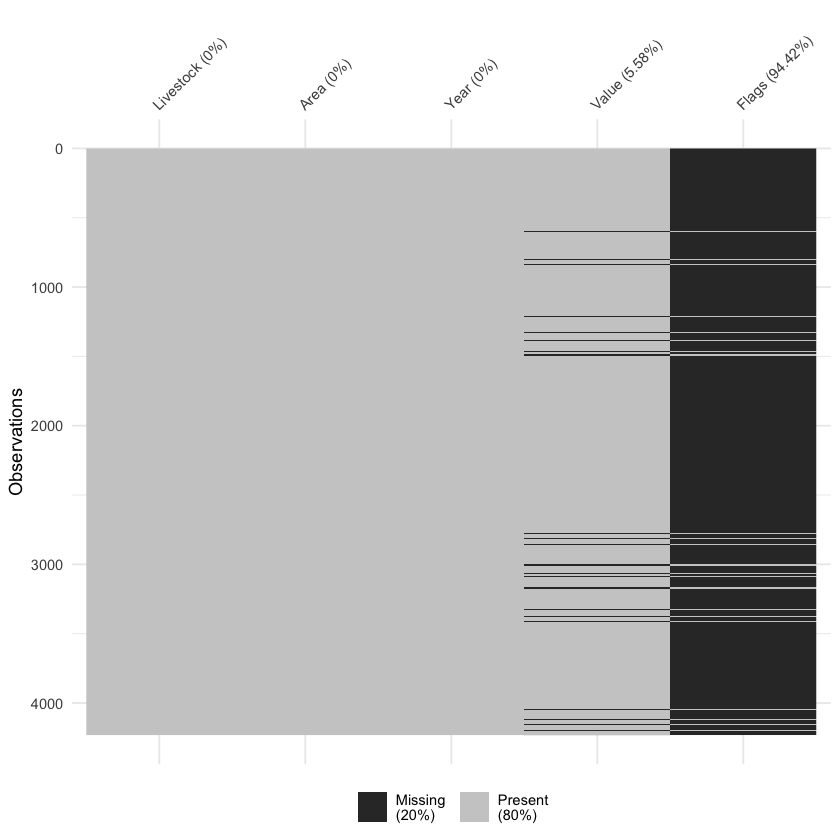

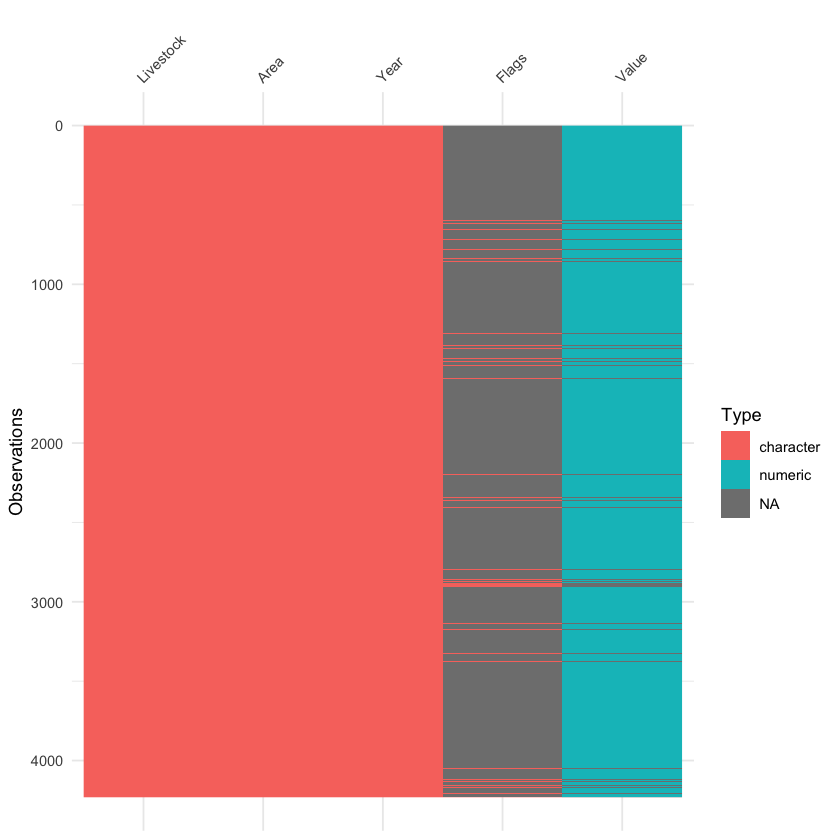

In [10]:
vis_miss(livestock_pop) # return any missing values inside the dataframe
vis_dat(livestock_pop)  # returns color coordinated ggplot according to its classes (elements) and if any missing values are present

###  Removing any identified NAs in our datasets.

#### For horti_pop Dataset

In [11]:
# Dropping all NAs in the column Value from "horti_pop" dataset
new_horti_pop <- horti_pop %>%
  drop_na(Value)               # drop_na() function drop any rows that contains missing values                

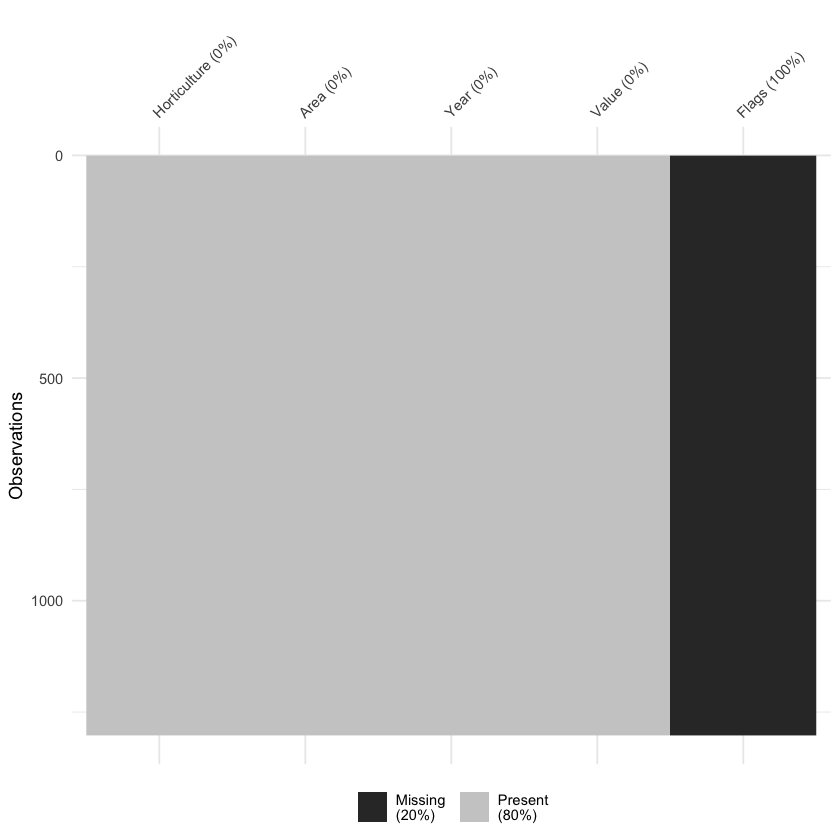

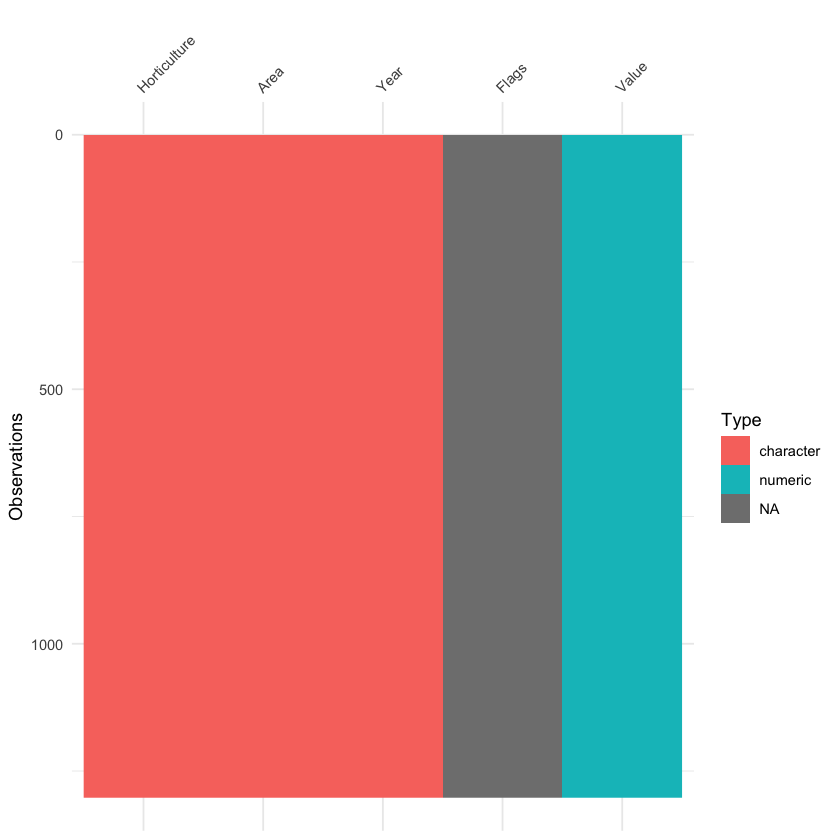

In [12]:
# Help visualize any missing values
vis_miss(new_horti_pop)  # return any missing values inside the dataframe
vis_dat(new_horti_pop) # returns color coordinated ggplot according to its classes (elements) and if any missing values are present

In [13]:
# Removing the column "FLags" as it only contains NA values
latest_horti_pop <- subset(new_horti_pop, select = -Flags)  

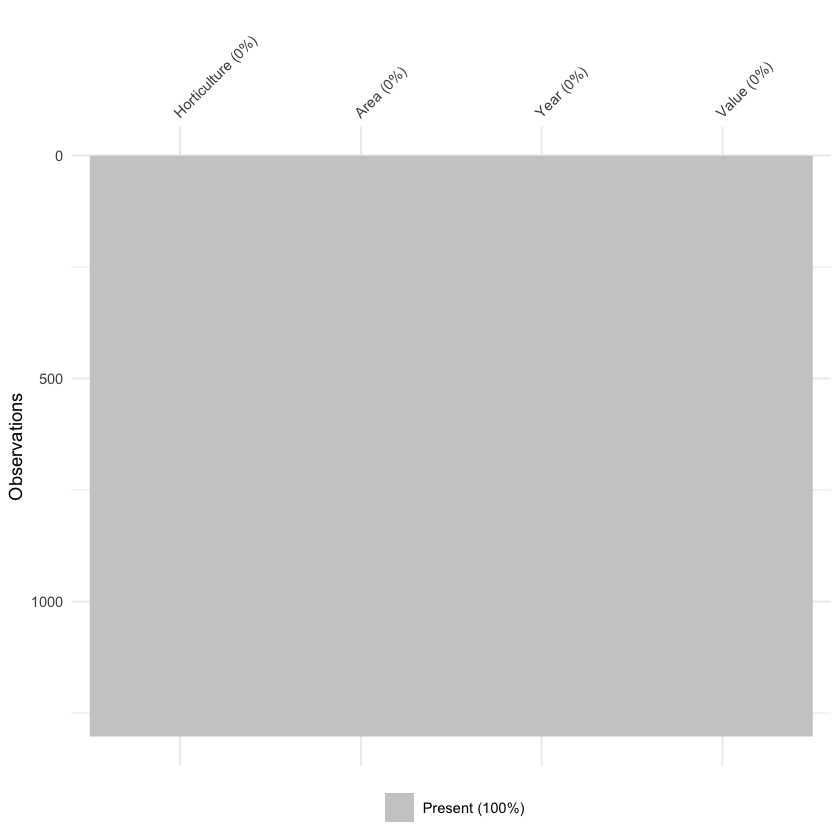

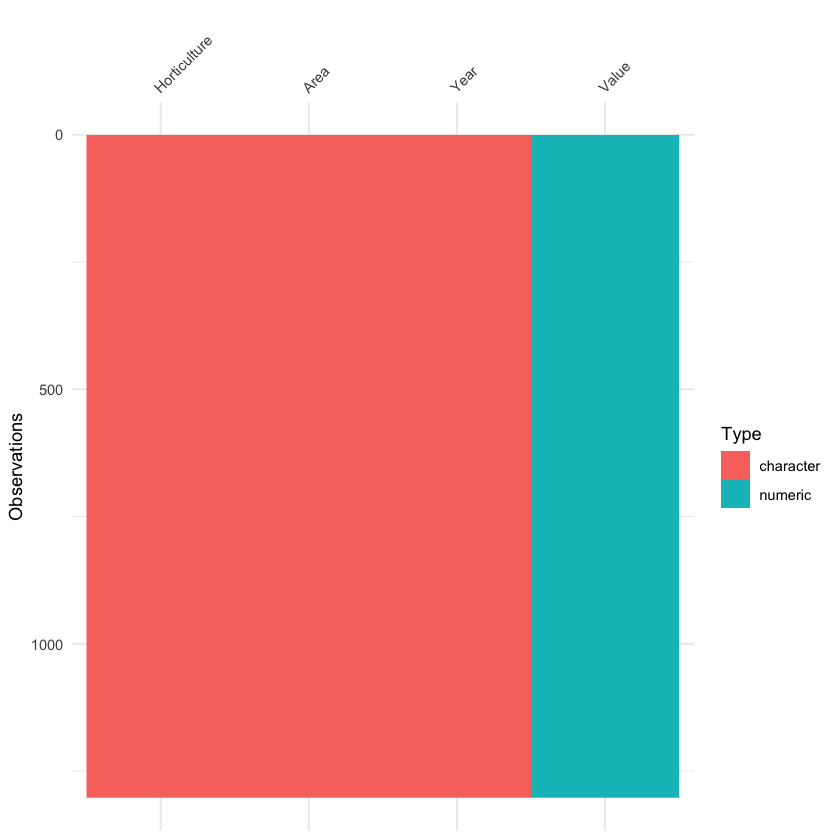

In [14]:
# Double checking if any NAs are still present
vis_miss(latest_horti_pop)  # return any missing values inside the dataframe
vis_dat(latest_horti_pop) # returns color coordinated ggplot according to its classes (elements) and if any missing values are present

#### For livestock_pop Dataset

In [15]:
#Dropping all NAs in the column Value from "livestock_pop" dataset
new_livestock_pop <- livestock_pop %>%
  drop_na(Value)                        # Drops NAs 

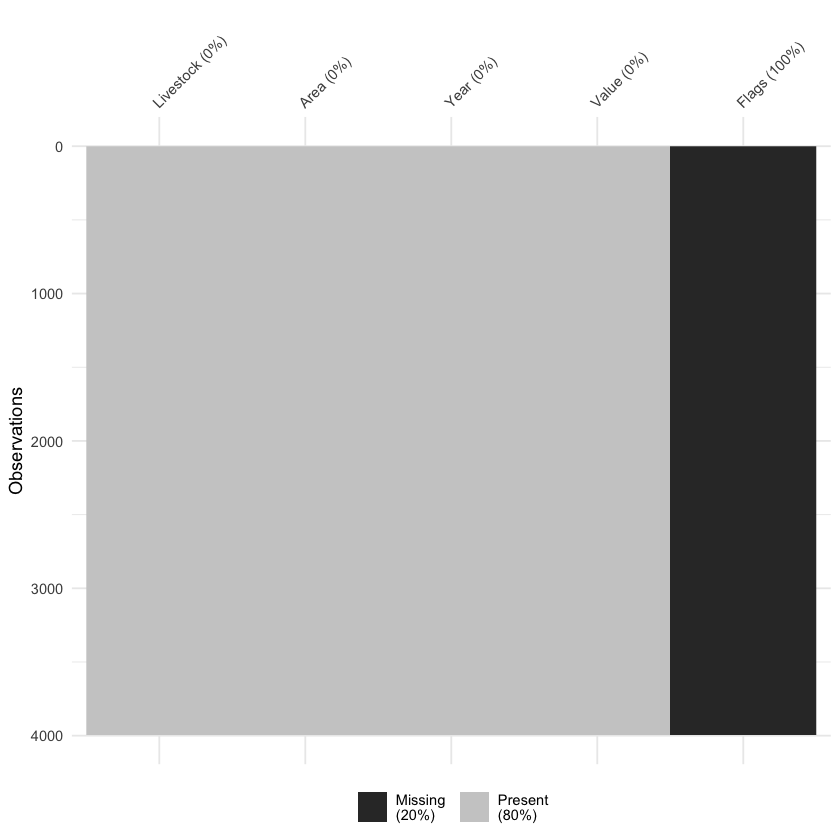

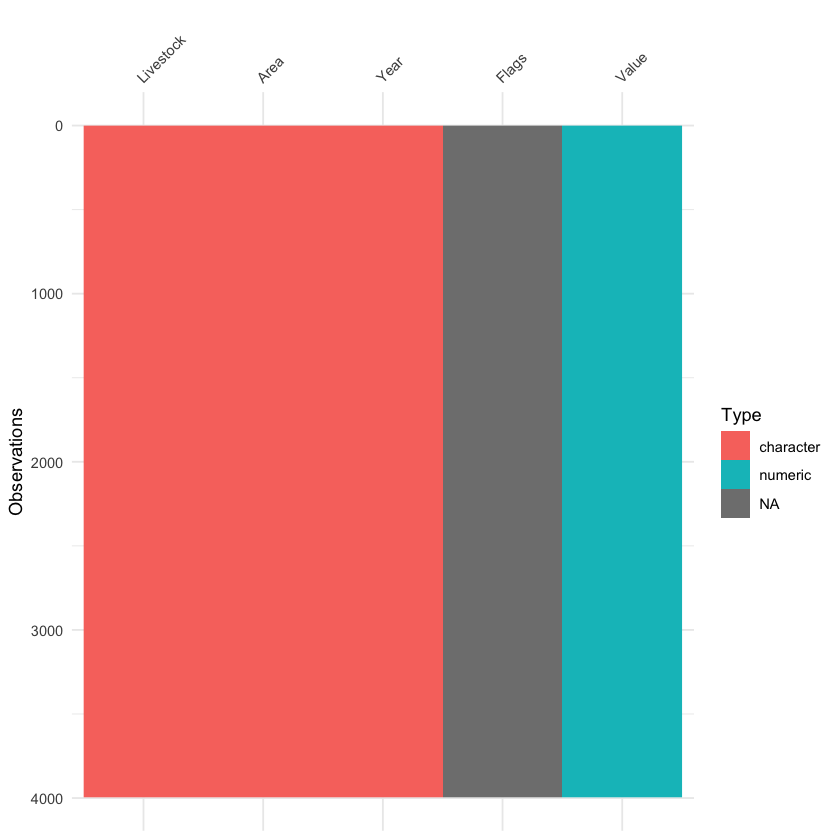

In [16]:
vis_miss(new_livestock_pop) # return any missing values inside the dataframe
vis_dat(new_livestock_pop)  # returns color coordinated ggplot according to its classes (elements) and if any missing values are present

In [17]:
# Removing the column "FLags" as it only contains NA values
latest_livestock_pop <- subset(new_livestock_pop, select = -Flags)  # subset() functions helps filter any unwanted variables

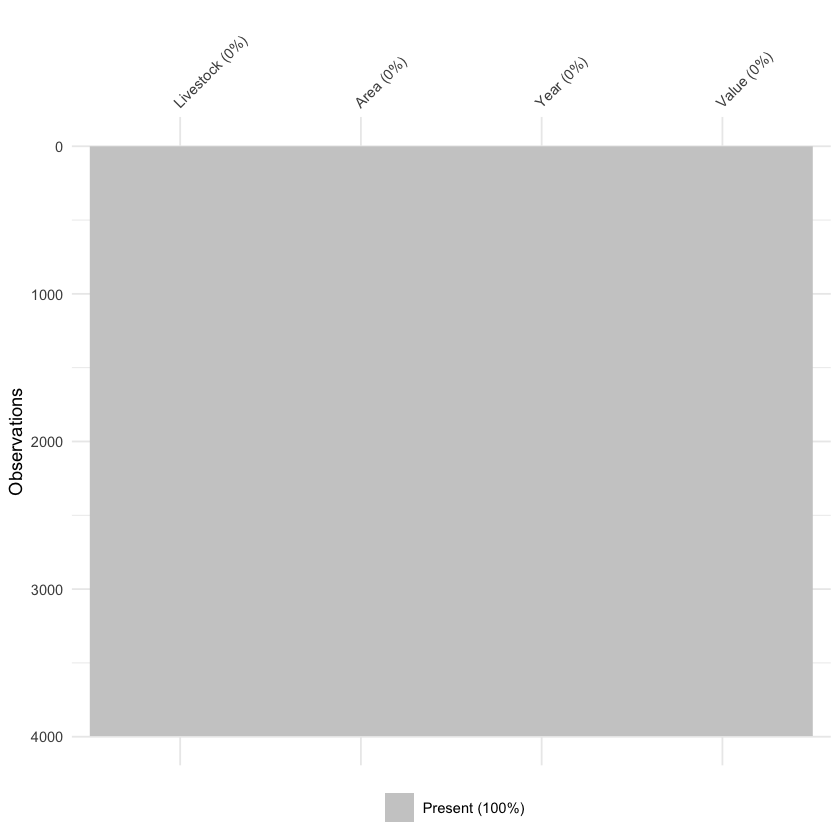

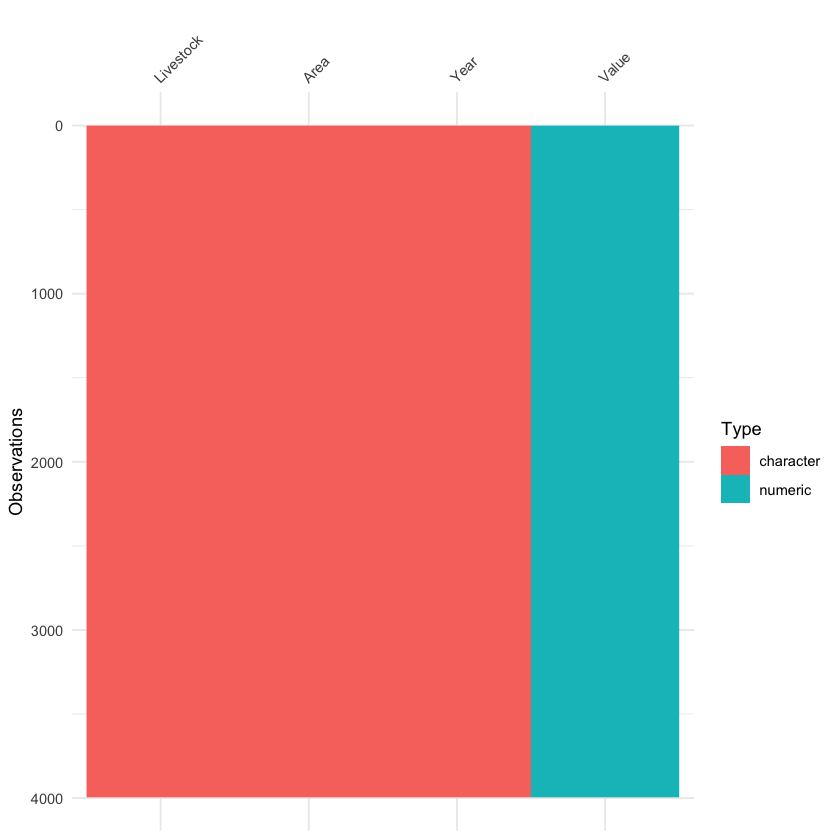

In [18]:
# Double checking if any NAs are still present
vis_miss(latest_livestock_pop) # return any missing values inside the dataframe
vis_dat(latest_livestock_pop) # returns color coordinated ggplot according to its classes (elements) and if any missing values are present

### Manipulating the format of the Dates, Renaming few variables, Filtering specific variables, etc.

#### For horti_pop Dataset

In [19]:
# This removes the wording "As at" in our dataset specifically at Years column
latest_horti_pop$Year <- gsub("As at ", "", as.character(latest_horti_pop$Year))   # gsub() function replaces specified strings with a new input values

In [20]:
# Standardizing dates
test <- latest_horti_pop %>% 
  filter(!startsWith(latest_horti_pop$Year, "June 30")) %>%  # filters to check that all dates start with 30th of June
  head() # shows first few rows

test

Horticulture Area Year Value

All observations were made as at June 30 of each year. Therefore, month and day is irrelevant and can be removed.

In [21]:
latest_horti_pop$Year <- gsub("June 30 ", "", as.character(latest_horti_pop$Year))     # gsub() function replaces specified strings with a new input values

In [22]:
# Turning the Year from character to numeric
latest_horti_pop$Year <- as.numeric(as.character(latest_horti_pop$Year))   # transforming column Year from character to numeric

In [23]:
# Removing irrelevant datas by using the filter() function
latest_horti_pop <- latest_horti_pop %>% 
  filter(Area != "Total New Zealand") %>%      # filtering unwanted areas
  filter(Area != "Total North Island") %>%     # filtering unwanted areas
  filter(Area != "Total South Island")         # filtering unwanted areas



In [24]:
# Renames the column Value to Total_Livestock by using rename() function
latest_horti_pop <- latest_horti_pop %>%   # creating new variable
  rename(Activity = "Horticulture")        # renaming columns

latest_horti_pop

Activity                     Area            Year Value 
1    Total apples (hectares)      Northland       1994  118.0
2    Total apples (hectares)      Northland       2002   71.0
3    Total apples (hectares)      Northland       2003   47.0
4    Total apples (hectares)      Northland       2007   30.0
5    Total apples (hectares)      Northland       2009   46.0
6    Total apples (hectares)      Northland       2011   29.0
7    Total apples (hectares)      Northland       2012   17.0
8    Total apples (hectares)      Northland       2014   25.0
9    Total apples (hectares)      Northland       2017   20.0
10   Total kiwifruit (hectares)   Northland       1994  715.0
11   Total kiwifruit (hectares)   Northland       2002  605.0
12   Total kiwifruit (hectares)   Northland       2003  601.0
13   Total kiwifruit (hectares)   Northland       2005  520.0
14   Total kiwifruit (hectares)   Northland       2007  634.0
15   Total kiwifruit (hectares)   Northland       2009  600.0
16   Total kiwifruit (hectares)   Northland       2011  510.0
17   Total kiwifruit (hectares)   Northland       2012  574.0
18   Total kiwifruit (hectares)   Northland       2014  447.2
19   Total kiwifruit (hectares)   Northland       2017  551.0
20   Total kiwifruit (hectares)   Northland       2019  598.0
21   Total kiwifruit (hectares)   Northland       2020  654.0
22   Total avocados (hectares)    Northland       1994  331.0
23   Total avocados (hectares)    Northland       2002  939.0
24   Total avocados (hectares)    Northland       2003 1013.0
25   Total avocados (hectares)    Northland       2005 1001.0
26   Total avocados (hectares)    Northland       2007 1325.0
27   Total avocados (hectares)    Northland       2009 1544.0
28   Total avocados (hectares)    Northland       2011 1496.0
29   Total avocados (hectares)    Northland       2012 1547.0
30   Total avocados (hectares)    Northland       2014 1450.0
⋮    ⋮                            ⋮               ⋮    ⋮     
1002 Total kiwifruit (hectares)   Chatham Islands 2020 0     
1003 Total avocados (hectares)    Chatham Islands 2012 0     
1004 Total avocados (hectares)    Chatham Islands 2014 0     
1005 Total avocados (hectares)    Chatham Islands 2017 0     
1006 Total avocados (hectares)    Chatham Islands 2019 0     
1007 Total avocados (hectares)    Chatham Islands 2020 0     
1008 Total wine grapes (hectares) Chatham Islands 2012 0     
1009 Total wine grapes (hectares) Chatham Islands 2014 0     
1010 Total wine grapes (hectares) Chatham Islands 2017 0     
1011 Total wine grapes (hectares) Chatham Islands 2019 0     
1012 Total wine grapes (hectares) Chatham Islands 2020 0     
1013 Total olives (hectares)      Chatham Islands 2012 0     
1014 Total olives (hectares)      Chatham Islands 2014 0     
1015 Total olives (hectares)      Chatham Islands 2017 0     
1016 Total olives (hectares)      Chatham Islands 2019 0     
1017 Total olives (hectares)      Chatham Islands 2020 0     
1018 Total onions (hectares)      Chatham Islands 2012 0     
1019 Total onions (hectares)      Chatham Islands 2014 0     
1020 Total onions (hectares)      Chatham Islands 2017 0     
1021 Total onions (hectares)      Chatham Islands 2019 0     
1022 Total onions (hectares)      Chatham Islands 2020 0     
1023 Total potatoes (hectares)    Chatham Islands 2014 0     
1024 Total potatoes (hectares)    Chatham Islands 2017 0     
1025 Total potatoes (hectares)    Chatham Islands 2019 0     
1026 Total potatoes (hectares)    Chatham Islands 2020 0     
1027 Total squash (hectares)      Chatham Islands 2012 0     
1028 Total squash (hectares)      Chatham Islands 2014 0     
1029 Total squash (hectares)      Chatham Islands 2017 0     
1030 Total squash (hectares)      Chatham Islands 2019 0     
1031 Total squash (hectares)      Chatham Islands 2020 0

#### For livestock_pop Dataset

In [25]:
# This removes the wording "As at June 30" in our dataset specifically at Years column
latest_livestock_pop$Year <- gsub("As at June 30", "", as.character(latest_livestock_pop$Year))    # gsub() function replaces specified strings with a new input values

In [26]:
# Turning the Year from character to numeric
latest_livestock_pop$Year <- as.numeric(as.character(latest_livestock_pop$Year))  

In [27]:
# Removing irrelevant datas by using the filter() function
latest_livestock_pop <- latest_livestock_pop %>%   # creating new variable name
  filter(Area != "Total New Zealand") %>%     # filtering unwanted areas
  filter(Area != "Total North Island") %>%    # filtering unwanted areas
  filter(Area != "Total South Island")        # filtering unwanted areas

latest_livestock_pop

Livestock                              Area            Year Value 
1    Total beef cattle                      Northland       1994 574072
2    Total beef cattle                      Northland       2002 468432
3    Total beef cattle                      Northland       2003 478201
4    Total beef cattle                      Northland       2004 451849
5    Total beef cattle                      Northland       2005 469262
6    Total beef cattle                      Northland       2006 490788
7    Total beef cattle                      Northland       2007 495833
8    Total beef cattle                      Northland       2008 507540
9    Total beef cattle                      Northland       2009 485231
10   Total beef cattle                      Northland       2010 465169
11   Total beef cattle                      Northland       2011 402434
12   Total beef cattle                      Northland       2012 380719
13   Total beef cattle                      Northland       2013 396376
14   Total beef cattle                      Northland       2014 349850
15   Total beef cattle                      Northland       2015 354569
16   Total beef cattle                      Northland       2016 356823
17   Total beef cattle                      Northland       2017 382957
18   Total beef cattle                      Northland       2018 400489
19   Total beef cattle                      Northland       2019 382124
20   Total beef cattle                      Northland       2020 377720
21   Total beef cattle                      Northland       2021 360991
22   Calves born alive to beef heifers/cows Northland       1994 136047
23   Calves born alive to beef heifers/cows Northland       2002 107864
24   Calves born alive to beef heifers/cows Northland       2003 104125
25   Calves born alive to beef heifers/cows Northland       2004  94213
26   Calves born alive to beef heifers/cows Northland       2005  96057
27   Calves born alive to beef heifers/cows Northland       2006  84903
28   Calves born alive to beef heifers/cows Northland       2007  92656
29   Calves born alive to beef heifers/cows Northland       2008  91637
30   Calves born alive to beef heifers/cows Northland       2009  92234
⋮    ⋮                                      ⋮               ⋮    ⋮     
3285 Fawns weaned                           Chatham Islands 2020   0   
3286 Fawns weaned                           Chatham Islands 2021   0   
3287 Total pigs                             Chatham Islands 1994 135   
3288 Total pigs                             Chatham Islands 2012   0   
3289 Total pigs                             Chatham Islands 2014   0   
3290 Total pigs                             Chatham Islands 2015   0   
3291 Total pigs                             Chatham Islands 2016   0   
3292 Total pigs                             Chatham Islands 2018   0   
3293 Total pigs                             Chatham Islands 2019   0   
3294 Total pigs                             Chatham Islands 2020   0   
3295 Total pigs                             Chatham Islands 2021   0   
3296 Piglets weaned                         Chatham Islands 2012   0   
3297 Piglets weaned                         Chatham Islands 2014   0   
3298 Piglets weaned                         Chatham Islands 2015   0   
3299 Piglets weaned                         Chatham Islands 2016   0   
3300 Piglets weaned                         Chatham Islands 2017   0   
3301 Piglets weaned                         Chatham Islands 2018   0   
3302 Piglets weaned                         Chatham Islands 2019   0   
3303 Piglets weaned                         Chatham Islands 2020   0   
3304 Piglets weaned                         Chatham Islands 2021   0   
3305 Total horses                           Chatham Islands 1994  54   
3306 Total horses                           Chatham Islands 2002  43   
3307 Total horses                           Chatham Islands 2007  19   
3308 Total horses                           C

In [28]:
# Removing unnecessary data 
latest_livestock_pop_remove <- latest_livestock_pop %>% # creates new variable that removes irrelevant areas
  filter(Livestock != "Total dairy cattle") %>%     # filtering unwanted data
  filter(Livestock != "Total beef cattle") %>%      # filtering unwanted data
  filter(Livestock != "Total sheep") %>%            # filtering unwanted data
  filter(Livestock != "Total deer")                 # filtering unwanted data

In [29]:
# Extracting the necessary datas/variables we want
latest_livestock_pop <- latest_livestock_pop[!(latest_livestock_pop$Livestock %in% latest_livestock_pop_remove$Livestock),]

latest_livestock_pop

Livestock          Area            Year Value 
1    Total beef cattle  Northland       1994 574072
2    Total beef cattle  Northland       2002 468432
3    Total beef cattle  Northland       2003 478201
4    Total beef cattle  Northland       2004 451849
5    Total beef cattle  Northland       2005 469262
6    Total beef cattle  Northland       2006 490788
7    Total beef cattle  Northland       2007 495833
8    Total beef cattle  Northland       2008 507540
9    Total beef cattle  Northland       2009 485231
10   Total beef cattle  Northland       2010 465169
11   Total beef cattle  Northland       2011 402434
12   Total beef cattle  Northland       2012 380719
13   Total beef cattle  Northland       2013 396376
14   Total beef cattle  Northland       2014 349850
15   Total beef cattle  Northland       2015 354569
16   Total beef cattle  Northland       2016 356823
17   Total beef cattle  Northland       2017 382957
18   Total beef cattle  Northland       2018 400489
19   Total beef cattle  Northland       2019 382124
20   Total beef cattle  Northland       2020 377720
21   Total beef cattle  Northland       2021 360991
22   Total dairy cattle Northland       1994 356561
23   Total dairy cattle Northland       2002 405387
24   Total dairy cattle Northland       2003 374019
25   Total dairy cattle Northland       2004 399064
26   Total dairy cattle Northland       2005 343195
27   Total dairy cattle Northland       2006 378152
28   Total dairy cattle Northland       2007 367183
29   Total dairy cattle Northland       2008 392193
30   Total dairy cattle Northland       2009 392577
⋮    ⋮                  ⋮               ⋮    ⋮     
1270 Total dairy cattle Chatham Islands 2015      0
1271 Total dairy cattle Chatham Islands 2016      0
1272 Total dairy cattle Chatham Islands 2017     52
1273 Total dairy cattle Chatham Islands 2018      0
1274 Total dairy cattle Chatham Islands 2019      0
1275 Total dairy cattle Chatham Islands 2020      0
1276 Total dairy cattle Chatham Islands 2021      0
1277 Total sheep        Chatham Islands 1994 103557
1278 Total sheep        Chatham Islands 2002  56723
1279 Total sheep        Chatham Islands 2007  68816
1280 Total sheep        Chatham Islands 2008  64202
1281 Total sheep        Chatham Islands 2010  67267
1282 Total sheep        Chatham Islands 2011  62861
1283 Total sheep        Chatham Islands 2012  59374
1284 Total sheep        Chatham Islands 2013  66956
1285 Total sheep        Chatham Islands 2014  62234
1286 Total sheep        Chatham Islands 2015  73763
1287 Total sheep        Chatham Islands 2016  59622
1288 Total sheep        Chatham Islands 2017  68914
1289 Total sheep        Chatham Islands 2020  64895
1290 Total deer         Chatham Islands 1994    173
1291 Total deer         Chatham Islands 2012      0
1292 Total deer         Chatham Islands 2013      0
1293 Total deer         Chatham Islands 2014      0
1294 Total deer         Chatham Islands 2015      0
1295 Total deer         Chatham Islands 2017      0
1296 Total deer         Chatham Islands 2018      0
1297 Total deer         Chatham Islands 2019      0
1298 Total deer         Chatham Islands 2020      0
1299 Total deer         Chatham Islands 2021      0

Renaming Variables.

In [30]:
latest_livestock_pop <- latest_livestock_pop %>%
  rename(Activity = "Livestock")                   # Renames Livestock to Activity by using the rename() function

**gsub()** function replaces specified strings with a new input values

In [31]:
latest_livestock_pop$Activity <- gsub("Total dairy cattle", "Dairy Cattle", as.character(latest_livestock_pop$Activity))  # replaces "Total" with nothing

In [32]:
latest_livestock_pop$Activity <- gsub("Total beef cattle", "Beef Cattle", as.character(latest_livestock_pop$Activity))   # replaces "Total" with nothing

In [33]:
latest_livestock_pop$Activity <- gsub("Total sheep", "Sheep", as.character(latest_livestock_pop$Activity))  # replaces "Total" with nothing

In [34]:
latest_livestock_pop$Activity <- gsub("Total deer", "Deer", as.character(latest_livestock_pop$Activity))  # replaces "Total" with nothing

#### Creating unique keys (interaction between Area and Years) for both datasets

In [35]:
# The interaction function computes a factor which will represents the interaction (e.g. between Year and Area).
latest_livestock_pop$key <- interaction(latest_livestock_pop$Area, latest_livestock_pop$Year,  sep = " ")   # Creating interaction between Area and Year in Livestock data

In [36]:
latest_horti_pop$key <- interaction(latest_horti_pop$Area, latest_horti_pop$Year, sep = " ")    # Creating interaction between Area and Year in Horticulture dataset

#### Transforming combined datasets to long and wide data format

In [37]:
 # full_join function returns all of the records in a new table
activity_long <- latest_horti_pop %>% full_join(latest_livestock_pop)  # returns all rows and columns for both datasets

Joining, by = c("Activity", "Area", "Year", "Value", "key")


In [38]:
# transform the combined dataset into long to wide format by using spread() function
activity_wide <- activity_long %>% spread(key = Activity, value = Value)    

### Renaming regions to match format of the other table

#### For column Area

Using **gsub()** function again which then replaces specified strings with a new input values

In [39]:
activity_wide$Area <- gsub("Hawkes", "Hawke's", as.character(activity_wide$Area))   # replaces inccorect names under area column

In [40]:
activity_wide$Area <- gsub("Manawatu-Wanganui", "Manawatu-Whanganui", as.character(activity_wide$Area))  # replaces inccorect names under area column

#### For column key

In [41]:
activity_wide$key <- gsub("Hawkes", "Hawke's", as.character(activity_wide$key))   # replaces inccorect names under area colum

In [42]:
activity_wide$key <- gsub("Manawatu-Wanganui", "Manawatu-Whanganui", as.character(activity_wide$key))  # replaces inccorect names under area colum

### Visualization (for understanding what those datas are telling us)

Using **ggplot** function from **ggplot2** package to make an aesthetic graphs relating to the data.

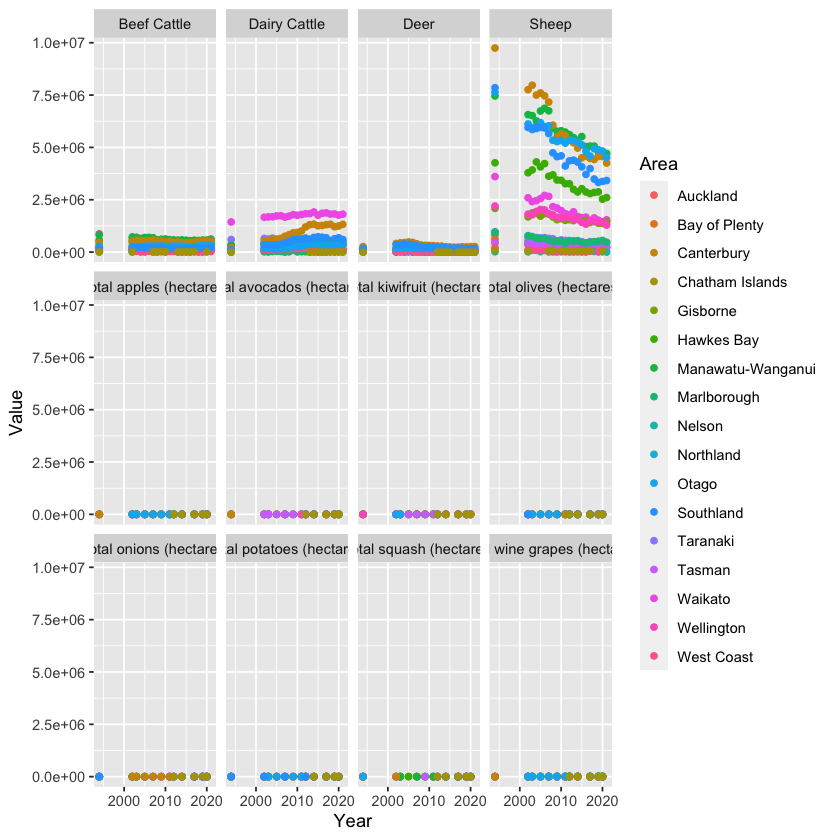

In [43]:
activity_long %>% 
    ggplot(aes(x = Year, y = Value, colour = Area)) +  
    geom_point() + 
    facet_wrap(~ Activity)   # generates multiple plots showing different subset of agriculture activities

options(repr.plot.width = 30, repr.plot.height = 30) #changing the size of the plot

### Farm Area Dataset

In [44]:
# reading the dataset in a csv format
data <- read_csv("https://raw.githubusercontent.com/beuri97/data201_gp/agri-activity/data/data.csv")

Rows: 211 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): region, variable, unit
dbl (2): value, year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [45]:
data

region                    variable    value year unit 
1   Northland Region          Farm counts  4143 2017 Count
2   Auckland Region           Farm counts  3156 2017 Count
3   Waikato Region            Farm counts  9006 2017 Count
4   Bay of Plenty Region      Farm counts  4377 2017 Count
5   Gisborne Region           Farm counts  1095 2017 Count
6   Hawke's Bay Region        Farm counts  2706 2017 Count
7   Taranaki Region           Farm counts  2985 2017 Count
8   Manawatu-Whanganui Region Farm counts  4806 2017 Count
9   Wellington Region         Farm counts  1698 2017 Count
10  West Coast Region         Farm counts   693 2017 Count
11  Canterbury Region         Farm counts  7815 2017 Count
12  Otago Region              Farm counts  3396 2017 Count
13  Southland Region          Farm counts  3402 2017 Count
14  Tasman Region             Farm counts  1374 2017 Count
15  Nelson Region             Farm counts    87 2017 Count
16  Marlborough Region        Farm counts  1512 2017 Count
17  Chatham Islands           Farm counts    42 2017 Count
18  New Zealand               Farm counts 52293 2017 Count
19  Northland Region          Farm counts  3960 2019 Count
20  Auckland Region           Farm counts  2928 2019 Count
21  Waikato Region            Farm counts  8601 2019 Count
22  Bay of Plenty Region      Farm counts  4236 2019 Count
23  Gisborne Region           Farm counts  1041 2019 Count
24  Hawke's Bay Region        Farm counts  2607 2019 Count
25  Taranaki Region           Farm counts  2829 2019 Count
26  Manawatu-Whanganui Region Farm counts  4647 2019 Count
27  Wellington Region         Farm counts  1569 2019 Count
28  West Coast Region         Farm counts   654 2019 Count
29  Canterbury Region         Farm counts  7161 2019 Count
30  Otago Region              Farm counts  3333 2019 Count
⋮   ⋮                         ⋮           ⋮     ⋮    ⋮    
182 Taranaki Region           Farm counts  3153 2012 Count
183 Manawatu-Whanganui Region Farm counts  5274 2012 Count
184 Wellington Region         Farm counts  1950 2012 Count
185 West Coast Region         Farm counts   708 2012 Count
186 Canterbury Region         Farm counts  8655 2012 Count
187 Otago Region              Farm counts  3606 2012 Count
188 Southland Region          Farm counts  3591 2012 Count
189 Tasman Region             Farm counts  1557 2012 Count
190 Nelson Region             Farm counts    90 2012 Count
191 Marlborough Region        Farm counts  1671 2012 Count
192 Chatham Islands           Farm counts    39 2012 Count
193 New Zealand               Farm counts 56703 2012 Count
194 Northland Region          Farm counts  4194 2016 Count
195 Auckland Region           Farm counts  3210 2016 Count
196 Waikato Region            Farm counts  8952 2016 Count
197 Bay of Plenty Region      Farm counts  4275 2016 Count
198 Gisborne Region           Farm counts  1104 2016 Count
199 Hawke's Bay Region        Farm counts  2712 2016 Count
200 Taranaki Region           Farm counts  3012 2016 Count
201 Manawatu-Whanganui Region Farm counts  4917 2016 Count
202 Wellington Region         Farm counts  1818 2016 Count
203 West Coast Region         Farm counts   687 2016 Count
204 Canterbury Region         Farm counts  8034 2016 Count
205 Otago Region              Farm counts  3447 2016 Count
206 Southland Region          Farm counts  3384 2016 Count
207 Tasman Region             Farm counts  1383 2016 Count
208 Nelson Region             Farm counts   102 2016 Count
209 Marlborough Region        Farm counts  1515 2016 Count
210 Chatham Islands           Farm counts    39 2016 Count
211 New Zealand               Farm counts 52785 2016 Count

In [46]:
# Cleaning the farm area data by using filter() and select() function.
farm_area <- data %>%       
  filter(unit == 'Hectares') %>%   # removes unwanted variables
  select(-variable) %>%  # removes unwanted column
  select(-unit)  # removes unwanted columns

In [47]:
farm_area  # shwows a much desired datasets

region                    value      year
1   Northland Region            724564.3 2017
2   Auckland Region             287639.4 2017
3   Waikato Region             1552321.4 2017
4   Bay of Plenty Region        610282.0 2017
5   Gisborne Region             561325.7 2017
6   Hawke's Bay Region          872612.2 2017
7   Taranaki Region             451999.7 2017
8   Manawatu-Whanganui Region  1423619.4 2017
9   Wellington Region           455764.0 2017
10  West Coast Region           187246.8 2017
11  Canterbury Region          2740335.7 2017
12  Otago Region               2075906.4 2017
13  Southland Region           1179116.4 2017
14  Tasman Region               216936.8 2017
15  Nelson Region                18292.9 2017
16  Marlborough Region          492406.6 2017
17  Chatham Islands              50037.5 2017
18  New Zealand               13900407.2 2017
19  Northland Region            706668.4 2019
20  Auckland Region             268632.0 2019
21  Waikato Region             1528315.7 2019
22  Bay of Plenty Region        581936.8 2019
23  Gisborne Region             533264.6 2019
24  Hawke's Bay Region          907310.9 2019
25  Taranaki Region             452313.0 2019
26  Manawatu-Whanganui Region  1363691.6 2019
27  Wellington Region           454627.8 2019
28  West Coast Region           191725.0 2019
29  Canterbury Region          2575683.8 2019
30  Otago Region               2139291.0 2019
⋮   ⋮                         ⋮          ⋮   
76  Hawke's Bay Region          918270   2012
77  Taranaki Region             442021   2012
78  Manawatu-Whanganui Region  1429233   2012
79  Wellington Region           480327   2012
80  West Coast Region           196635   2012
81  Canterbury Region          2801462   2012
82  Otago Region               2320563   2012
83  Southland Region           1201569   2012
84  Tasman Region               238762   2012
85  Nelson Region                16363   2012
86  Marlborough Region          523750   2012
87  New Zealand               14393802   2012
88  Northland Region            754226   2016
89  Auckland Region             280916   2016
90  Waikato Region             1627293   2016
91  Bay of Plenty Region        593234   2016
92  Gisborne Region             574586   2016
93  Hawke's Bay Region          920805   2016
94  Taranaki Region             431661   2016
95  Manawatu-Whanganui Region  1413349   2016
96  Wellington Region           445321   2016
97  West Coast Region           188852   2016
98  Canterbury Region          2598424   2016
99  Otago Region               2171748   2016
100 Southland Region           1176256   2016
101 Tasman Region               226577   2016
102 Nelson Region                12773   2016
103 Marlborough Region          525327   2016
104 Chatham Islands              50551   2016
105 New Zealand               13991897   2016

removing the "Region" from region column in our dataset by using the **gsub** function which then replaces specified strings with a new input values

In [48]:
farm_area$region <- gsub(" Region", "", as.character(farm_area$region))  

In [49]:
# Arranging form highest to lowest order 
farm_area %>% arrange(desc(year))

region             value      year
1   Northland            706668.4 2019
2   Auckland             268632.0 2019
3   Waikato             1528315.7 2019
4   Bay of Plenty        581936.8 2019
5   Gisborne             533264.6 2019
6   Hawke's Bay          907310.9 2019
7   Taranaki             452313.0 2019
8   Manawatu-Whanganui  1363691.6 2019
9   Wellington           454627.8 2019
10  West Coast           191725.0 2019
11  Canterbury          2575683.8 2019
12  Otago               2139291.0 2019
13  Southland           1054669.9 2019
14  Tasman               213822.0 2019
15  Nelson                23418.4 2019
16  Marlborough          511355.9 2019
17  Chatham Islands       54448.5 2019
18  New Zealand        13561175.3 2019
19  Northland            724564.3 2017
20  Auckland             287639.4 2017
21  Waikato             1552321.4 2017
22  Bay of Plenty        610282.0 2017
23  Gisborne             561325.7 2017
24  Hawke's Bay          872612.2 2017
25  Taranaki             451999.7 2017
26  Manawatu-Whanganui  1423619.4 2017
27  Wellington           455764.0 2017
28  West Coast           187246.8 2017
29  Canterbury          2740335.7 2017
30  Otago               2075906.4 2017
⋮   ⋮                  ⋮          ⋮   
76  Gisborne             614524   2007
77  Hawke's Bay          951986   2007
78  Taranaki             470218   2007
79  Manawatu-Whanganui  1417246   2007
80  Wellington           490634   2007
81  West Coast           200126   2007
82  Canterbury          3080261   2007
83  Otago               2331143   2007
84  Southland           1178136   2007
85  Tasman               253307   2007
86  Nelson                17528   2007
87  Marlborough          507119   2007
88  New Zealand        14700897   2007
89  Northland            809897   2002
90  Auckland             301801   2002
91  Waikato             1730266   2002
92  Bay of Plenty        599973   2002
93  Gisborne             643228   2002
94  Hawke's Bay          961804   2002
95  Taranaki             496540   2002
96  Manawatu-Whanganui  1545218   2002
97  Wellington           503838   2002
98  West Coast           225454   2002
99  Canterbury          3150891   2002
100 Otago               2378770   2002
101 Southland           1198388   2002
102 Tasman               277019   2002
103 Nelson                21331   2002
104 Marlborough          696049   2002
105 New Zealand        15589885   2002

In [50]:
 # Removing all rows that is New Zealand
farm_area <- farm_area %>% filter(!region == "New Zealand")  

### Joining Farm Area Dataset and Farm Activity (Wide) Dataset

Renaming variable names using **rename** function

In [51]:
farm_area <- farm_area %>%  
  rename(Area = "region")     # renames a specific column

In [52]:
farm_area <- farm_area %>%  
  rename(Year = "year")      # renames a specific column

In [53]:
farm_area <- farm_area %>% 
  rename(Total_Hectares = "value")  # renames a specific column

In [54]:
# Created a column of keys by using interaction function which computes a factor which will represents the interaction (e.g. between Year and Area).
farm_area$key <- interaction(farm_area$Area, farm_area$Year,  sep = " ") 

In [55]:
# Joining farm area data with farm activity data 
activity_wide2 <- farm_area %>% full_join(activity_wide)    # full_join function returns all of the records in a new table

Joining, by = c("Area", "Year", "key")


In [56]:
# Rearranging columns to be a more logical order
activity_wide2 <- activity_wide2[, c(1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 2)] 



In [57]:
industry_area_df <- get_data_from_mfe('bdb33831db5d4adf8555db598057cdb9' ,'table-95343')   # Calling the function made along with API

In [99]:
industry_area_df

Area               Year key                     farm_type         area_ha
1   Northland          2002 Northland 2002          Dairy             204072 
2   Auckland           2002 Auckland 2002           Dairy              61995 
3   Waikato            2002 Waikato 2002            Dairy             521714 
4   Bay of Plenty      2002 Bay of Plenty 2002      Dairy             119644 
5   Gisborne           2002 Gisborne 2002           Dairy               3586 
6   Hawke's Bay        2002 Hawke's Bay 2002        Dairy              26966 
7   Taranaki           2002 Taranaki 2002           Dairy             216646 
8   Manawatu-Whanganui 2002 Manawatu-Whanganui 2002 Dairy             154477 
9   Wellington         2002 Wellington 2002         Dairy              42263 
10  West Coast         2002 West Coast 2002         Dairy              69957 
11  Canterbury         2002 Canterbury 2002         Dairy             164570 
12  Otago              2002 Otago 2002              Dairy              87617 
13  Southland          2002 Southland 2002          Dairy             117253 
14  Tasman             2002 Tasman 2002             Dairy              36512 
15  Nelson             2002 Nelson 2002             Dairy                752 
16  Marlborough        2002 Marlborough 2002        Dairy              15362 
17  Northland          2007 Northland 2007          Dairy             189597 
18  Auckland           2007 Auckland 2007           Dairy              48943 
19  Waikato            2007 Waikato 2007            Dairy             557888 
20  Bay of Plenty      2007 Bay of Plenty 2007      Dairy             103245 
21  Gisborne           2007 Gisborne 2007           Dairy                 NA 
22  Hawke's Bay        2007 Hawke's Bay 2007        Dairy              26453 
23  Taranaki           2007 Taranaki 2007           Dairy             205346 
24  Manawatu-Whanganui 2007 Manawatu-Whanganui 2007 Dairy             149276 
25  Wellington         2007 Wellington 2007         Dairy              42506 
26  West Coast         2007 West Coast 2007         Dairy              93609 
27  Canterbury         2007 Canterbury 2007         Dairy             226825 
28  Otago              2007 Otago 2007              Dairy              87009 
29  Southland          2007 Southland 2007          Dairy             173154 
30  Tasman             2007 Tasman 2007             Dairy              38606 
⋮   ⋮                  ⋮    ⋮                       ⋮                 ⋮      
591 Waikato            2012 Waikato 2012            Vegetable growing  7453  
592 Bay of Plenty      2012 Bay of Plenty 2012      Vegetable growing   395  
593 Gisborne           2012 Gisborne 2012           Vegetable growing  5331  
594 Hawke's Bay        2012 Hawke's Bay 2012        Vegetable growing 11218  
595 Taranaki           2012 Taranaki 2012           Vegetable growing    NA  
596 Manawatu-Whanganui 2012 Manawatu-Whanganui 2012 Vegetable growing  7540  
597 Wellington         2012 Wellington 2012         Vegetable growing    NA  
598 West Coast         2012 West Coast 2012         Vegetable growing    10  
599 Canterbury         2012 Canterbury 2012         Vegetable growing 25562  
600 Otago              2012 Otago 2012              Vegetable growing   612  
601 Southland          2012 Southland 2012          Vegetable growing  1412  
602 Tasman             2012 Tasman 2012             Vegetable growing   714  
603 Nelson             2012 Nelson 2012             Vegetable growing    NA  
604 Marlborough        2012 Marlborough 2012        Vegetable growing  1217  
605 Northland          2016 Northland 2016          Vegetable growing  3718  
606 Auckland           2016 Auckland 2016           Vegetable growing  7700  
607 Waikato            2016 Waikato 2016            Vegetable growing  6231  
608 Bay of Plenty      2016 Bay of Plenty 2016      Vegetable growing   210  
609 Gisborne           2016 Gisborne 2016           Vegetable growing  8123  
610 Hawke's Bay        201

In [104]:
industry_area_df %>% 
    select(farm_type) %>% 
    distinct()

farm_type        
1  Dairy            
2  Floriculture     
3  Forestry         
4  Fruit and berry  
5  Grain growing    
6  Nursery and turf 
7  Other            
8  Other Livestock  
9  Sheep and Beef   
10 Total            
11 Vegetable growing

In [106]:
industry_area_df$region <- industry_area_df$region  %>%  
gsub('Region', '',.) %>% 
gsub('Wanganui', 'Whanganui',.) %>% 
gsub(' ', '',.) %>% 
gsub('BayofPlenty', 'Bay of Plenty',.) %>% 
gsub('ChathamIslands', 'Chatham Islands',.) %>% 
gsub("Hawke'sBay", "Hawke's Bay",.) %>% 
gsub('WestCoast', 'West Coast',.)

industry_area_df$key <- interaction(industry_area_df$region, industry_area_df$year,  sep = " ") 

industry_area_df <- industry_area_df %>% 
rename(Year = 'year') %>% 
rename(Area = 'region')

industry_area_df <- industry_area_df[, c(3,2,5,1,4)]

industry_area_df

ERROR: Error in `$<-.data.frame`(`*tmp*`, region, value = character(0)): replacement has 0 rows, data has 620


In [107]:
industry_area_df$area_ha <- industry_area_df$area_ha %>% as.double()

industry_area_df_wide <- industry_area_df %>% 
spread(key = farm_type, value = area_ha)

industry_area_df_wide <- industry_area_df_wide %>% 
filter(!Area == 'NewZealand')

industry_area_df_wide$Year <- as.double(industry_area_df_wide$Year)

industry_area_df_wide$key <- as.character(industry_area_df_wide$key)

industry_area_df_wide <- industry_area_df_wide %>% 
rename(`Dairy area (ha)` = 'Dairy') %>% 
rename(`Floriculture area (ha)` = 'Floriculture') %>% 
rename(`Forestry area (ha)` = 'Forestry') %>% 
rename(`Fruit and berry area (ha)` = 'Fruit and berry') %>% 
rename(`Grain growing area (ha)` = 'Grain growing') %>% 
rename(`Nursery and turf area (ha)` = 'Nursery and turf') %>% 
rename(`Other area (ha)` = 'Other') %>% 
rename(`Other Livestock area (ha)` = 'Other Livestock') %>% 
rename(`Sheep and Beef area (ha)` = 'Sheep and Beef') %>% 
rename(`Vegetable growing area (ha)` = 'Vegetable growing') %>% 
select(-Total)

In [79]:


library(highcharter)

In [127]:
horticulture <- industry_area_df %>%    # creating new variable for chosen total horticulture over regions and years
    filter(!Area == 'NewZealand', farm_type %in% c("Fruit and berry", "Grain growing", "Vegetable growing")) %>%   # filtering only 3 horticulture activity 
    na.omit() %>%  # removing all NAs
    group_by(Area, Year) %>%   # grouping columns
    summarise(totarea = sum(area_ha))  %>%   # getting the total per region and year
    group_by(Year)  %>%  # grouping by only Years
    summarise(mean_totarea = mean(totarea))   # summarising by the mean value of all total area 

horticulture

`summarise()` has grouped output by 'Area'. You can override using the
`.groups` argument.


Year mean_totarea
1 2002 26752.56    
2 2007 36556.93    
3 2012 38161.88    
4 2016 39959.81

In [124]:
line_chart_horticulture <- highchart()  %>% 
    hc_yAxis_multipl


line_chart_horticulture

HTML widgets cannot be represented in plain text (need html)

In [61]:
activity_wide2 <- activity_wide2 %>% 
full_join(industry_area_df_wide)

Joining, by = c("Area", "Year", "key")


In [62]:
activity_wide2

Area               Year key                     Beef Cattle Dairy Cattle
1   Northland          2017 Northland 2017          382957       379401     
2   Auckland           2017 Auckland 2017           111948       132323     
3   Waikato            2017 Waikato 2017            488033      1871594     
4   Bay of Plenty      2017 Bay of Plenty 2017      104751       325175     
5   Gisborne           2017 Gisborne 2017           247238         9407     
6   Hawke's Bay        2017 Hawke's Bay 2017        421163        87675     
7   Taranaki           2017 Taranaki 2017           117954       590846     
8   Manawatu-Whanganui 2017 Manawatu-Whanganui 2017 567856       463057     
9   Wellington         2017 Wellington 2017         134924        96804     
10  West Coast         2017 West Coast 2017          27422       156204     
11  Canterbury         2017 Canterbury 2017         467550      1308058     
12  Otago              2017 Otago 2017              262823       333850     
13  Southland          2017 Southland 2017          175201       681011     
14  Tasman             2017 Tasman 2017              39805        66114     
15  Nelson             2017 Nelson 2017                 NA         2925     
16  Marlborough        2017 Marlborough 2017         52448        25315     
17  Chatham Islands    2017 Chatham Islands 2017     11299           52     
18  Northland          2019 Northland 2019          382124       334733     
19  Auckland           2019 Auckland 2019           118180       123504     
20  Waikato            2019 Waikato 2019            546980      1822904     
21  Bay of Plenty      2019 Bay of Plenty 2019      106802       317633     
22  Gisborne           2019 Gisborne 2019           254428           NA     
23  Hawke's Bay        2019 Hawke's Bay 2019        448764        78002     
24  Taranaki           2019 Taranaki 2019           125144       587033     
25  Manawatu-Whanganui 2019 Manawatu-Whanganui 2019 574889       467626     
26  Wellington         2019 Wellington 2019         149976        82779     
27  West Coast         2019 West Coast 2019          31361       152552     
28  Canterbury         2019 Canterbury 2019         524587      1212575     
29  Otago              2019 Otago 2019              325432       352639     
30  Southland          2019 Southland 2019          191503       636241     
⋮   ⋮                  ⋮    ⋮                       ⋮           ⋮           
322 Wellington         1994 Wellington 1994         212679       83935      
323 Wellington         2003 Wellington 2003         176290      111973      
324 Wellington         2004 Wellington 2004         174206       95021      
325 Wellington         2005 Wellington 2005         171035       95274      
326 Wellington         2006 Wellington 2006         176204      103290      
327 Wellington         2008 Wellington 2008         140381      103525      
328 Wellington         2009 Wellington 2009         146794       85331      
329 Wellington         2010 Wellington 2010         143398       92375      
330 Wellington         2011 Wellington 2011         150561      114120      
331 Wellington         2013 Wellington 2013         131471      108647      
332 Wellington         2014 Wellington 2014         148369       97599      
333 Wellington         2015 Wellington 2015         121431      109992      
334 Wellington         2018 Wellington 2018         131828       79130      
335 Wellington         2020 Wellington 2020         151838      100234      
336 Wellington         2021 Wellington 2021         153655       92511      
337 West Coast         1994 West Coast 1994          67733       79251      
338 West Coast         2003 West Coast 2003          36968      122572      
339 West Coast         2004 West Coast 2004          31274      141401      
340 West Coast         2005 West Coast 2005          32275      142370      
341 West Coast         2006 West Coast 2006          37097      148730      


Using **ggplot** function from **ggplot2** package to make an aesthetic graphs relating to the data.

Warning message:
“Removed 1 rows containing missing values (position_stack).”


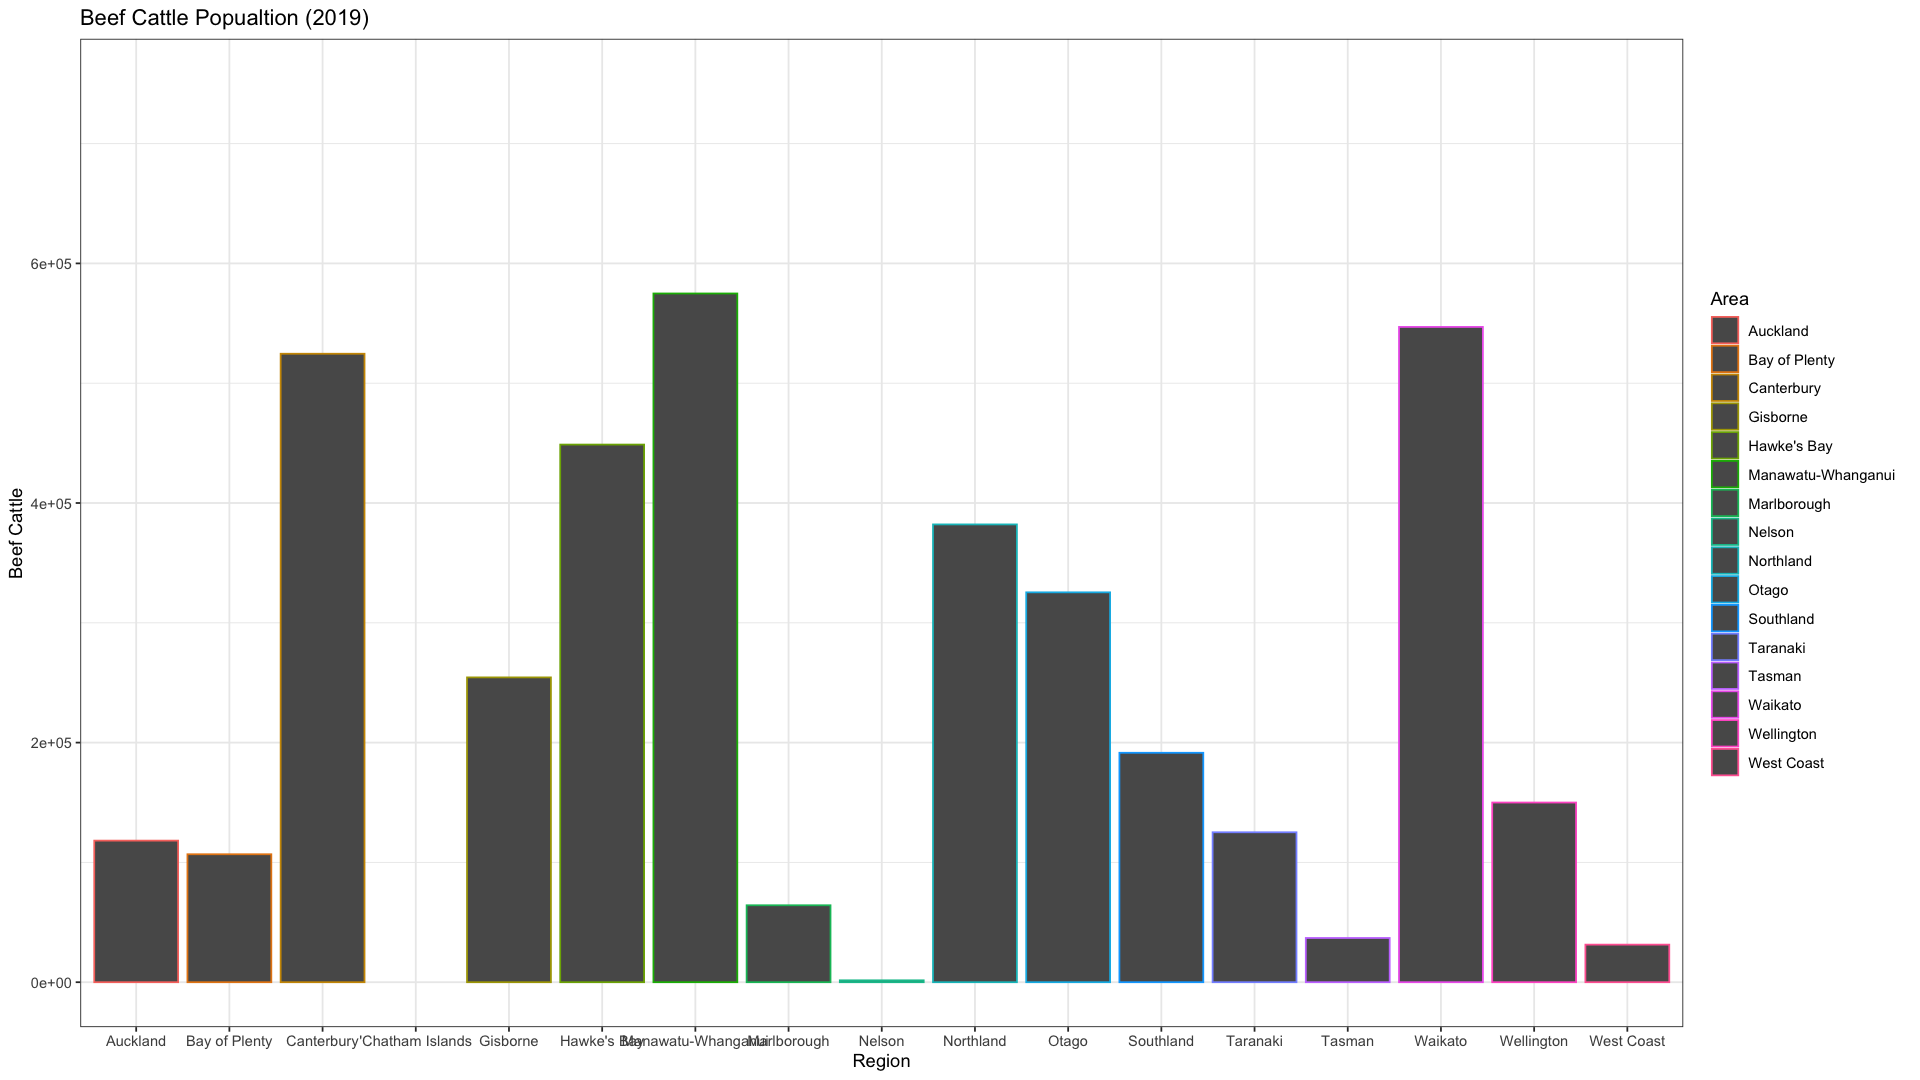

In [63]:
# Beef Cattle
options(repr.plot.width = 16, repr.plot.height = 9)

plot <- activity_wide2 %>% 
filter(Year == 2019) %>% 
    ggplot(aes(x = `Area`, y = `Beef Cattle`, colour = Area)) + 
    geom_bar(stat = 'identity') +
    theme(text = element_text(size = 8)) +
    scale_x_discrete(limit = c("Auckland", "Bay of Plenty", "Canterbury", "'Chatham Islands", "Gisborne", "Hawke's Bay", "Manawatu-Whanganui", "Marlborough", "Nelson", "Northland", "Otago", "Southland", "Taranaki", "Tasman", "Waikato", "Wellington", "West Coast")) +
    labs(title = "Beef Cattle Popualtion (2019)",
        x = "Region",
        y = "Beef Cattle") +
    theme(plot.title = element_text(face = "bold", colour = "black", size = 20, hjust = 0.5),
          axis.title = element_text(face = "bold", size = 15))  +
    theme_bw()
        


plot <- plot + ylim (0, 750000)

plot

#ggsave('plot-beef-pop-2019.jpg', width = 16, height = 9)

Warning message:
“Removed 5 rows containing missing values (position_stack).”
Warning message:
“Removed 5 rows containing missing values (position_stack).”


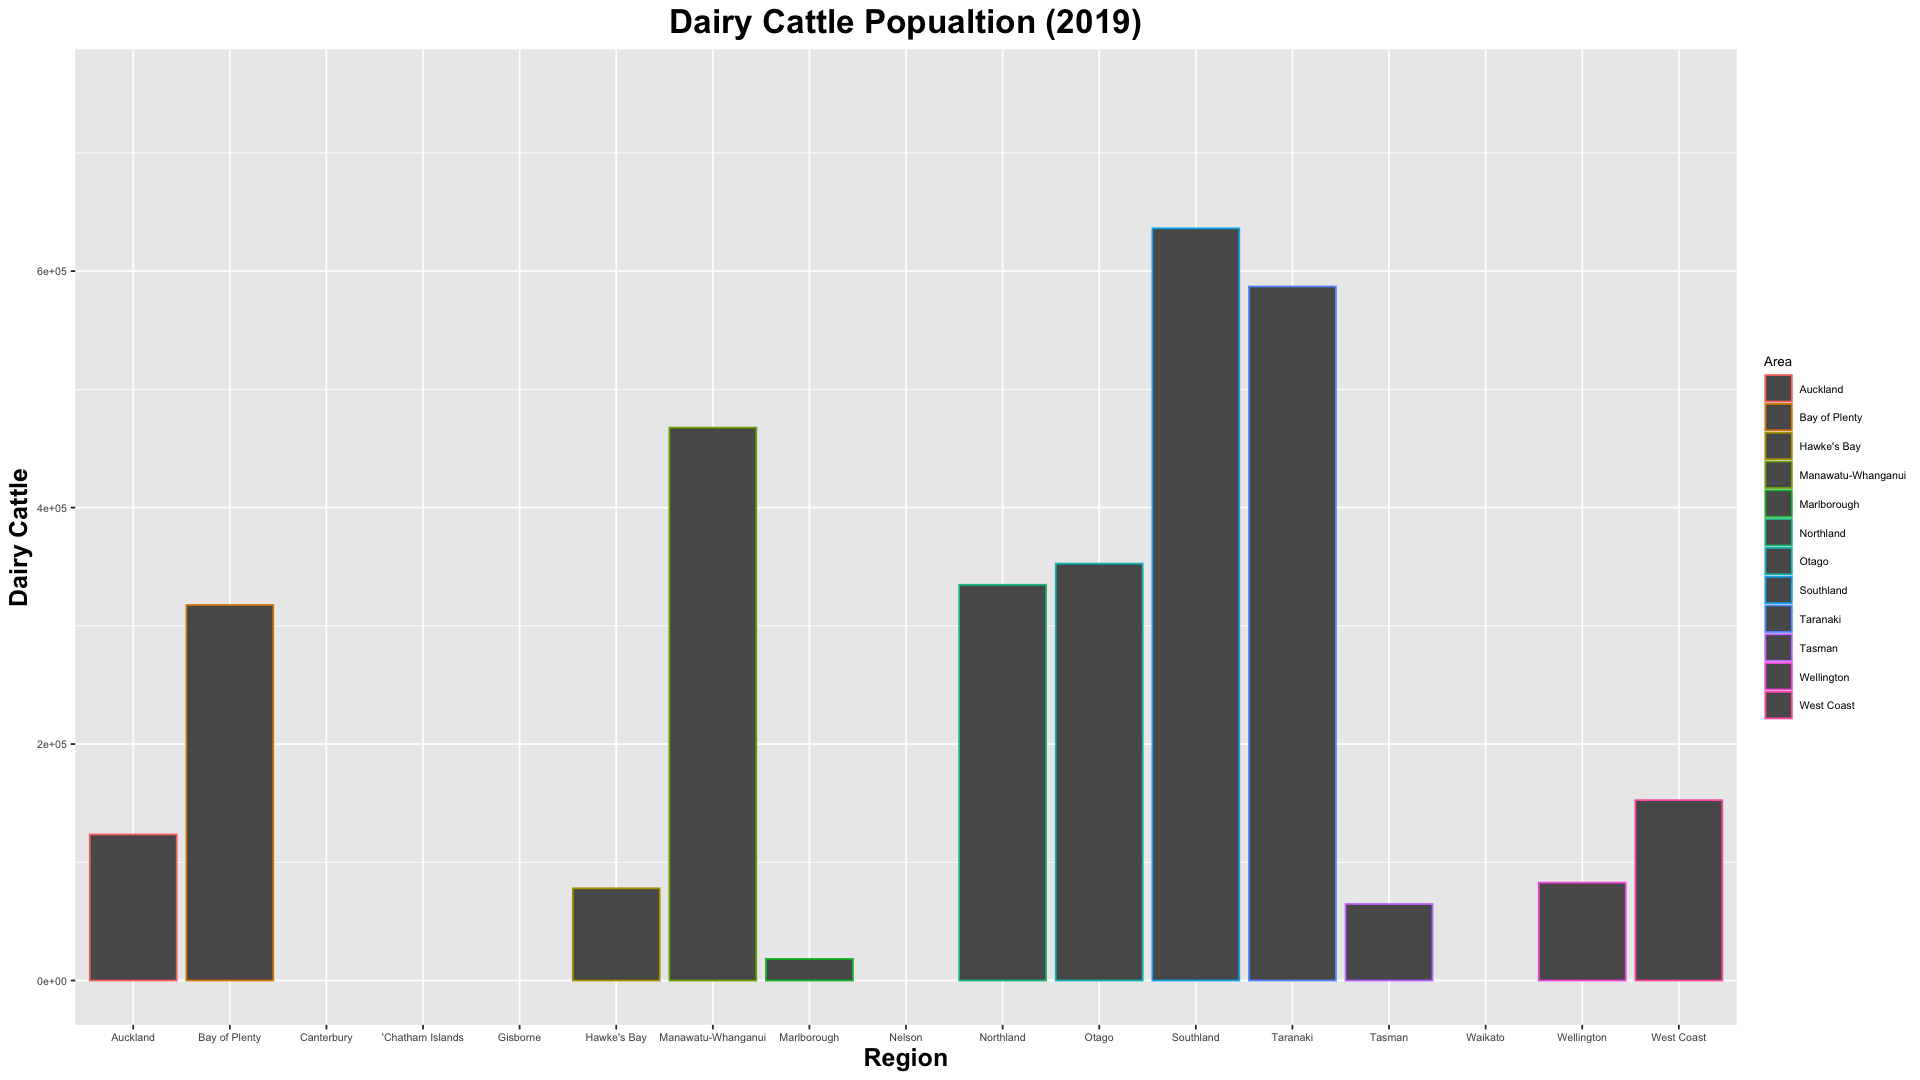

In [64]:
# Dairy Cattle
options(repr.plot.width = 16, repr.plot.height = 9)

plot2 <- activity_wide2 %>% 
filter(Year == 2019) %>% 
    ggplot(aes(x = `Area`, y = `Dairy Cattle`, colour = Area)) + 
    geom_bar(stat = 'identity') +
    theme(text = element_text(size = 8)) +
    scale_x_discrete(limit = c("Auckland", "Bay of Plenty", "Canterbury", "'Chatham Islands", "Gisborne", "Hawke's Bay", "Manawatu-Whanganui", "Marlborough", "Nelson", "Northland", "Otago", "Southland", "Taranaki", "Tasman", "Waikato", "Wellington", "West Coast")) +
    labs(title = "Dairy Cattle Popualtion (2019)",
        x = "Region",
        y = "Dairy Cattle") +
    theme(plot.title = element_text(face = "bold", colour = "black", size = 20, hjust = 0.5),
          axis.title = element_text(face = "bold", size = 15)) 
        


plot2 <- plot2 + ylim (0, 750000)

plot2

ggsave('plot-dairy-pop-2019.jpg', width = 16, height = 9)

Warning message:
“Removed 34 rows containing missing values (position_stack).”


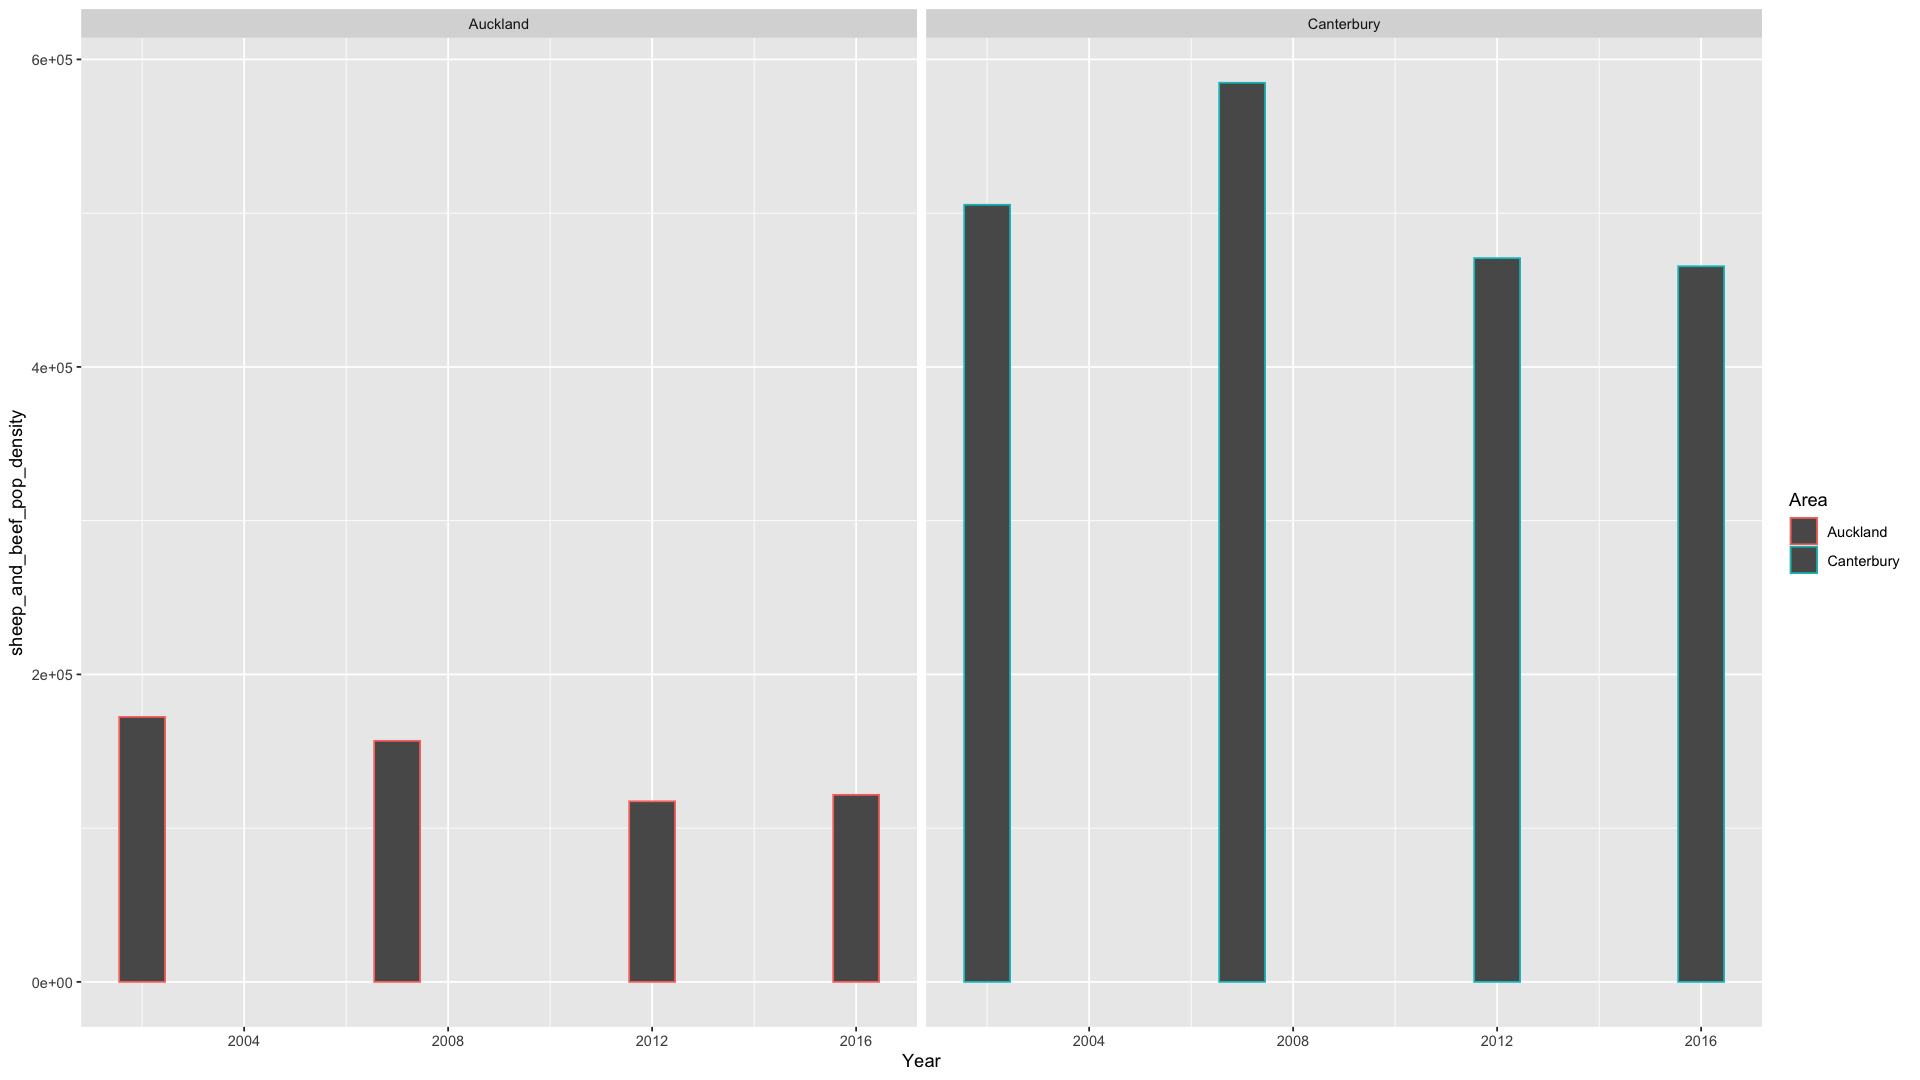

In [65]:
# Getting the Density of Beef Cattle and sheep per Hectare 
test2 <- activity_wide2 %>% 
    mutate(sheep_and_beef_pop_density = `Beef Cattle` + `Sheep` / `Sheep and Beef area (ha)`)  # add new columns

# Plotting Density of Beef Cattle and sheep per Hectare using ggplot
test2 %>% filter(Area == "Canterbury" | Area == "Auckland") %>%      # filtering desired action
  ggplot(aes(x = Year, y = sheep_and_beef_pop_density, colour = Area)) + geom_bar(stat = 'identity') +  # iniating the graph
  facet_grid(cols = vars(Area))   # generates small multiple plots

Warning message:
“Removed 34 rows containing missing values (position_stack).”


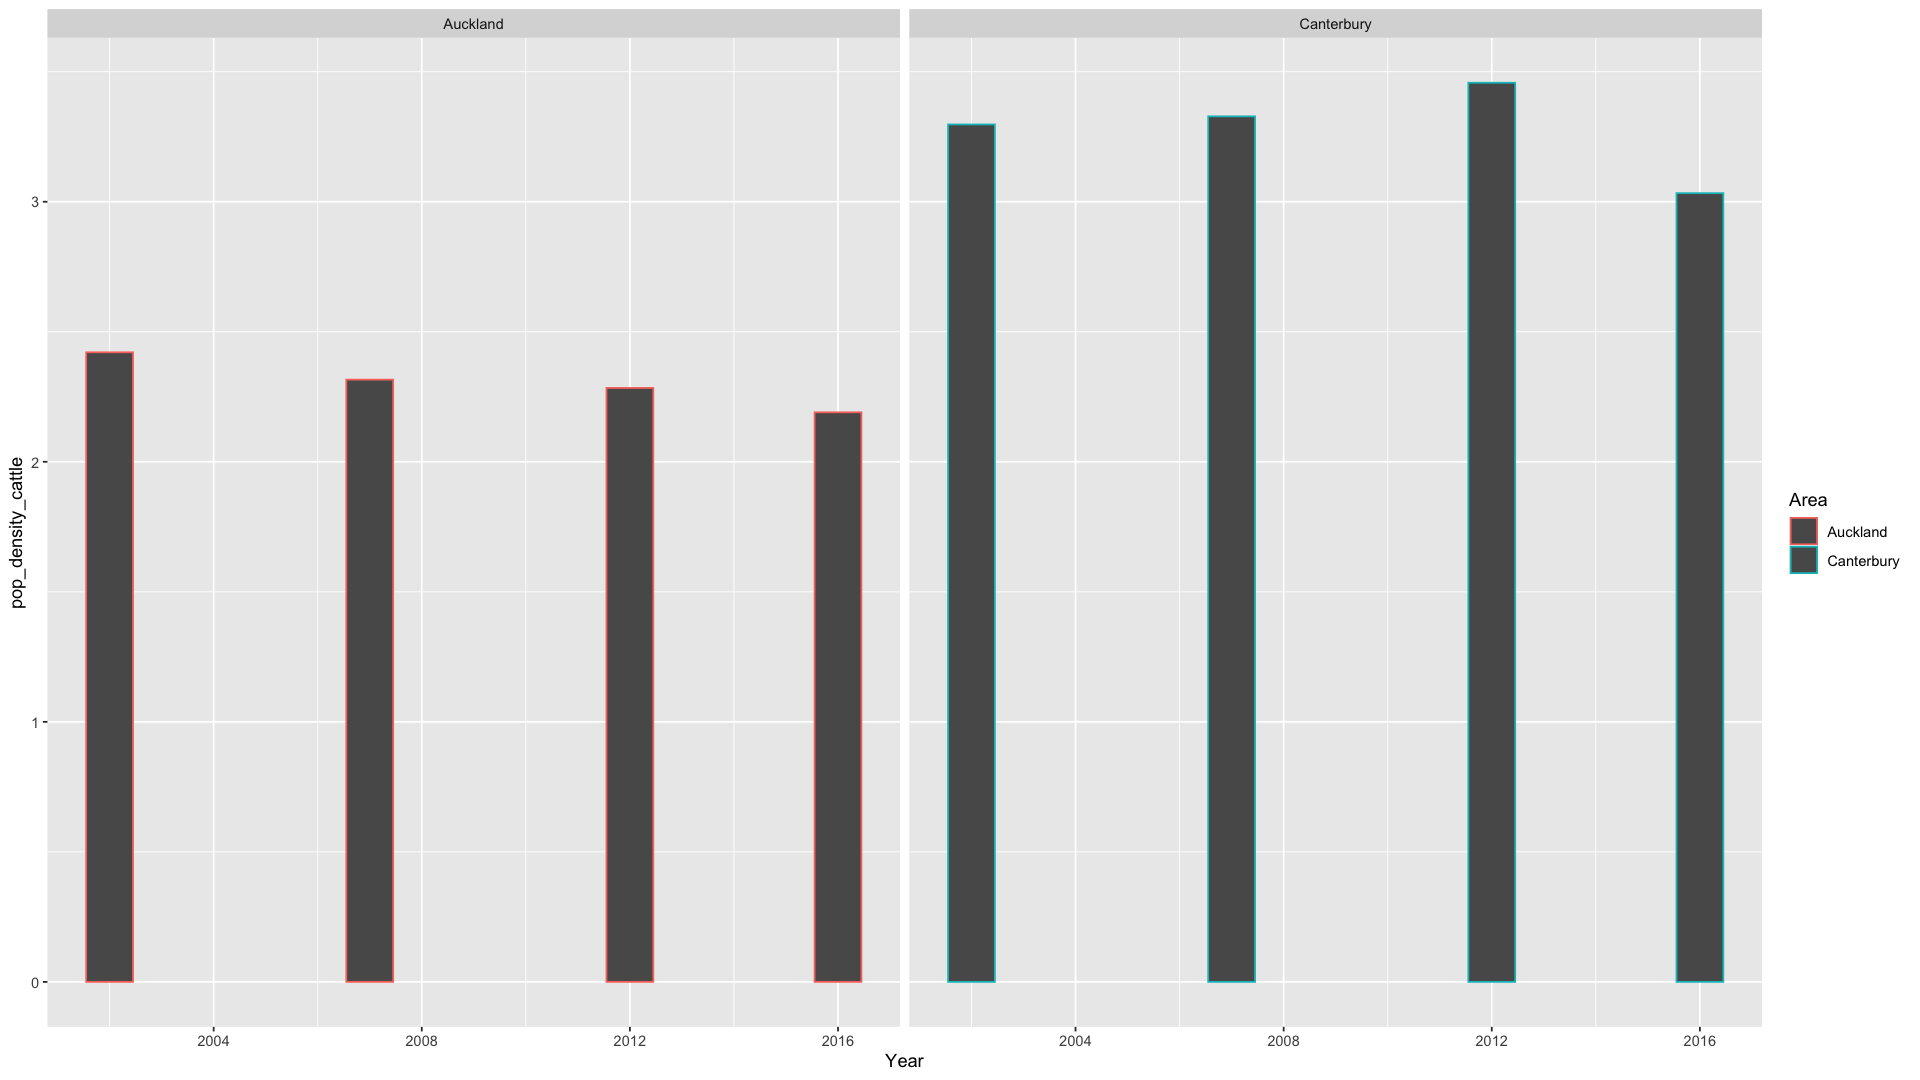

In [66]:
# Plotting poulation density of dairy cattle (dairy cattle / dairy area)

density_cattle <- activity_wide2 %>% 
    mutate(pop_density_cattle = `Dairy Cattle` / `Dairy area (ha)`)  # add new columns


density_cattle %>% filter(Area == "Canterbury" | Area == "Auckland")  %>% 
    ggplot(aes(x = Year, y = pop_density_cattle, colour = Area)) + 
    geom_bar(stat = "identity") +
    facet_grid(cols = vars(Area))

Warning message:
“Removed 34 rows containing missing values (position_stack).”


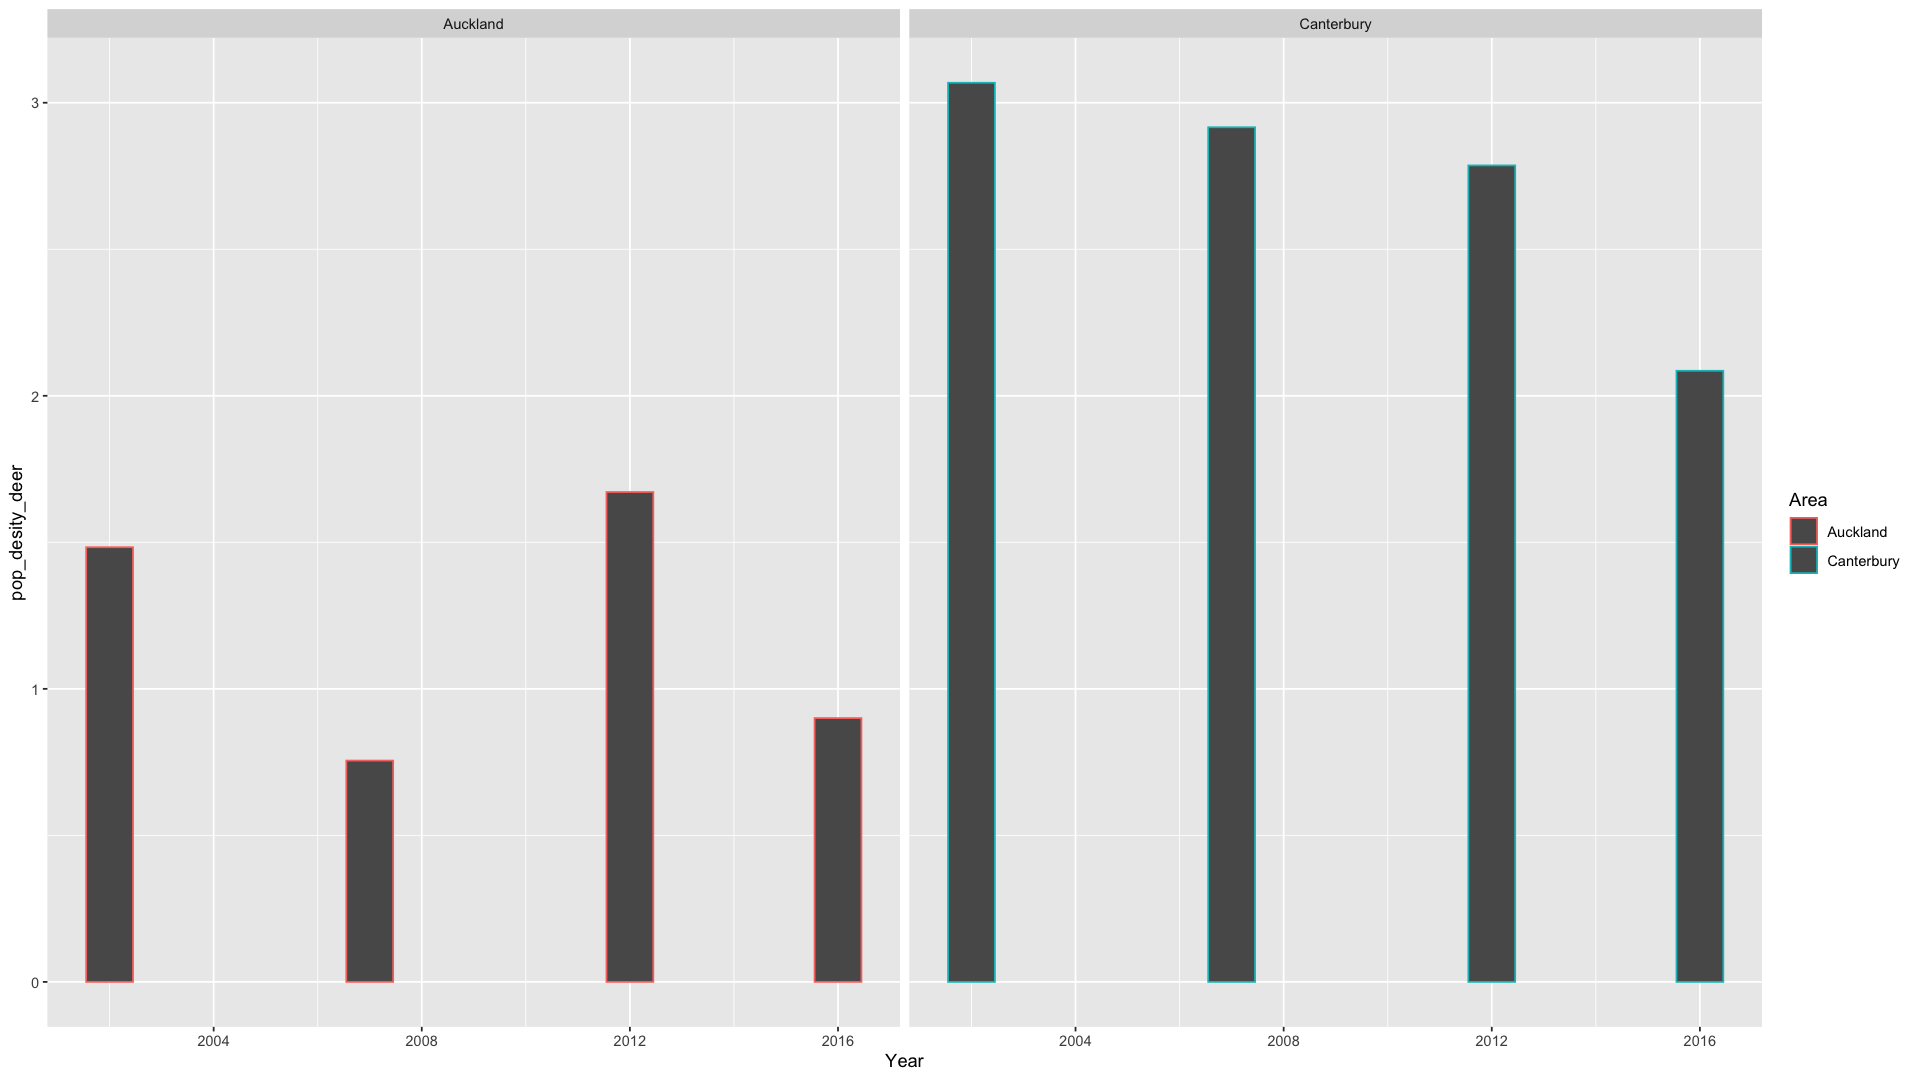

In [67]:
# Plotting population density of other livestock (deer / other livestock area)

density_deer <- activity_wide2  %>% 
    mutate(pop_desity_deer = `Deer` / `Other Livestock area (ha)`)

density_deer %>% filter(Area == "Canterbury" | Area == "Auckland")  %>% 
    ggplot(aes(x = Year, y = pop_desity_deer, colour = Area)) + 
    geom_bar(stat = "identity") +
    facet_grid(cols = vars(Area))

Warning message:
“Removed 34 rows containing missing values (position_stack).”


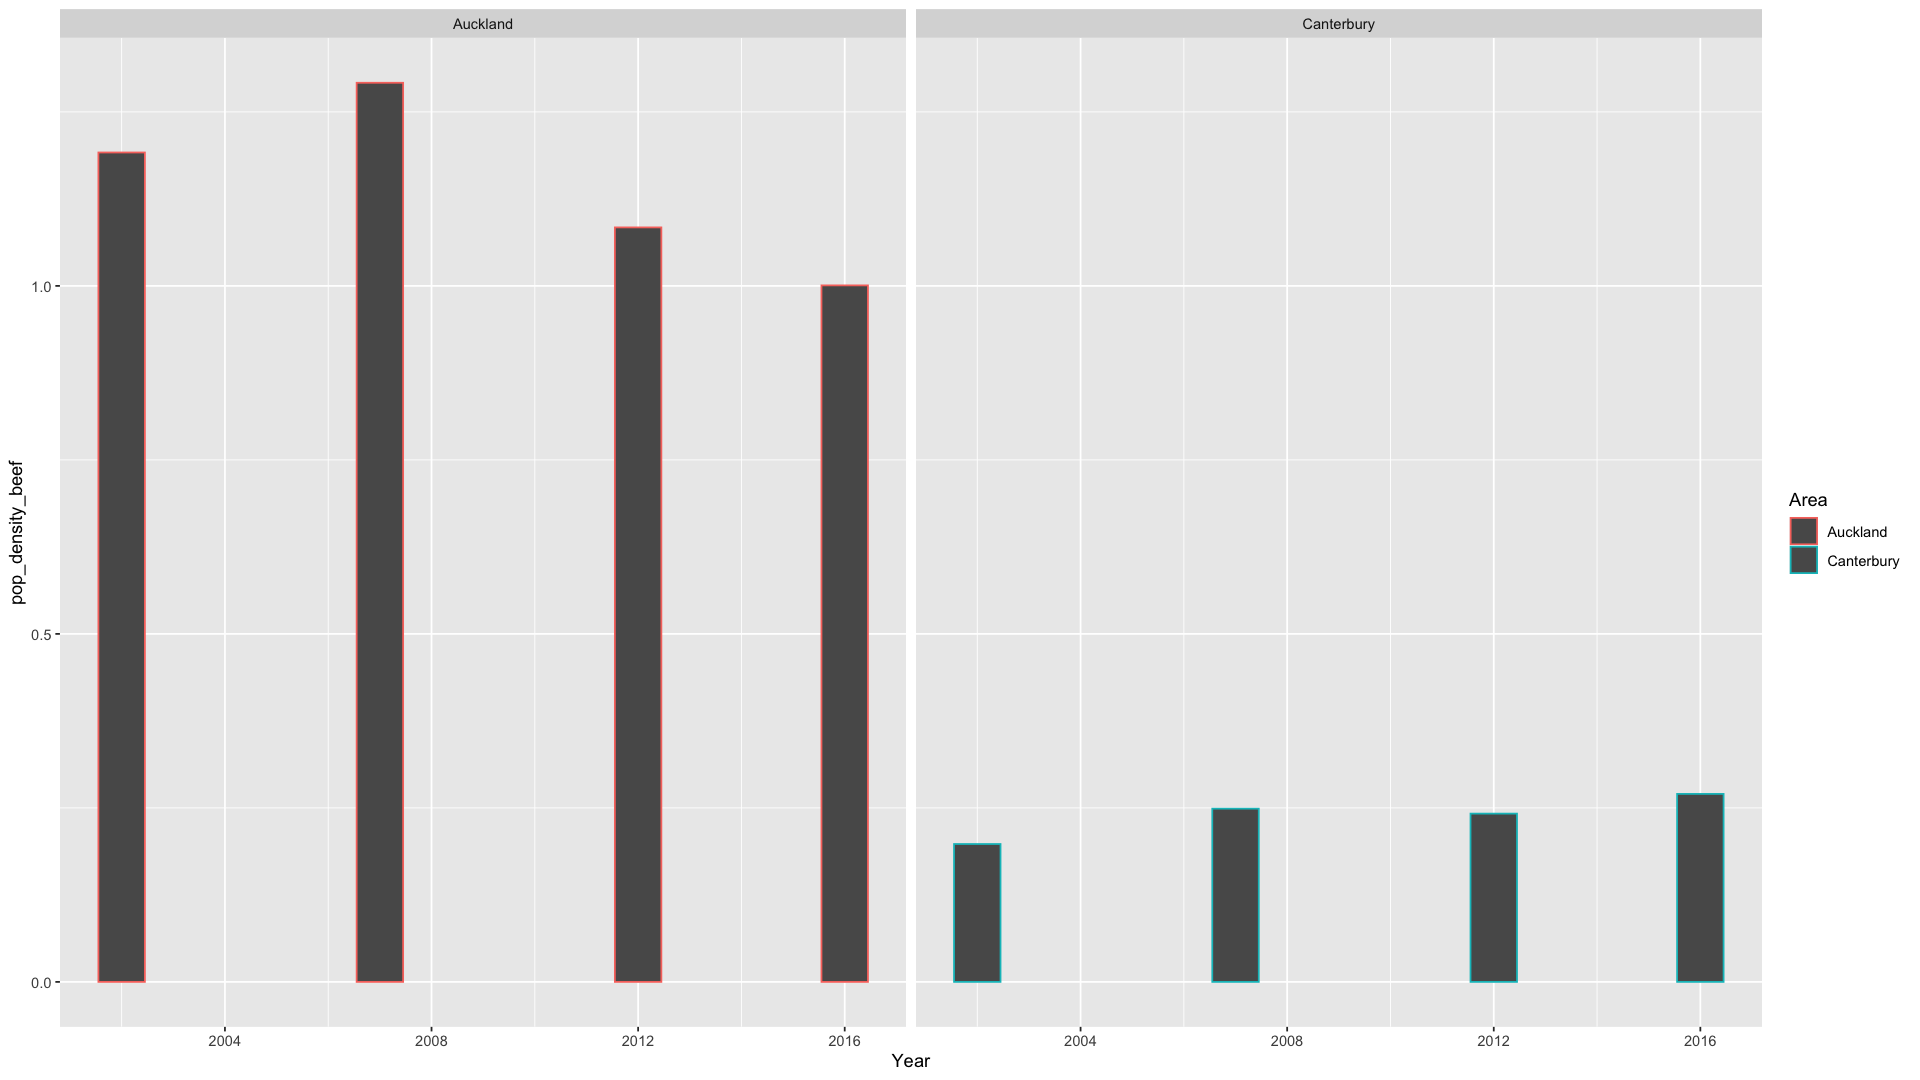

In [68]:
# plotting only beef population density

density_beef <- activity_wide2  %>%  
    mutate(pop_density_beef = `Beef Cattle` / `Sheep and Beef area (ha)`)

density_beef  %>%  filter(Area == "Canterbury" | Area == "Auckland")  %>% 
    ggplot(aes(x = Year, y = pop_density_beef, colour = Area)) + 
    geom_bar(stat = "identity") +
    facet_grid(cols = vars(Area))

Warning message:
“Removed 34 rows containing missing values (position_stack).”


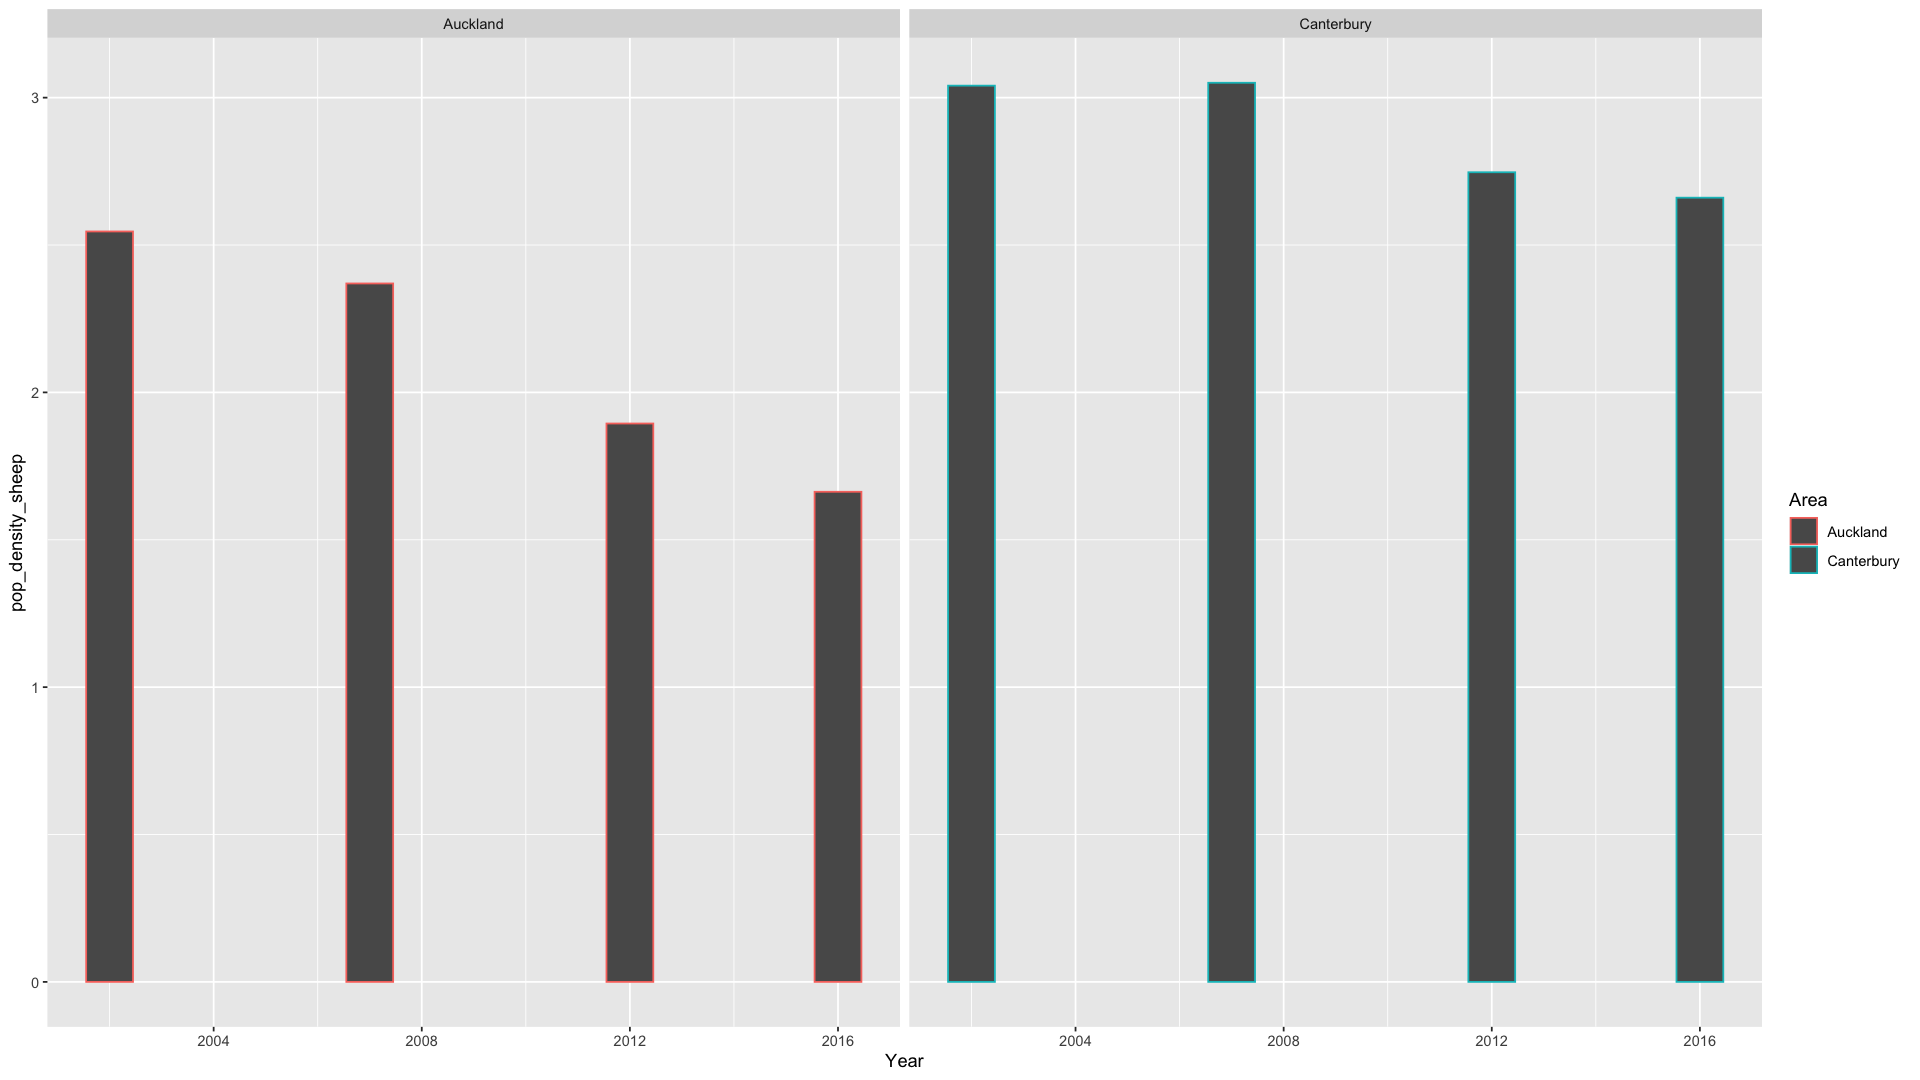

In [69]:
# plotting only sheep population density

density_sheep <- activity_wide2  %>% 
    mutate(pop_density_sheep = `Sheep` / `Sheep and Beef area (ha)`) 

density_sheep  %>% filter(Area == "Canterbury" | Area == "Auckland")  %>% 
    ggplot(aes(x = Year, y = pop_density_sheep, colour = Area)) + 
    geom_bar(stat = "identity") +
    facet_grid(cols = vars(Area))

Warning message:
“Removed 4 row(s) containing missing values (geom_path).”


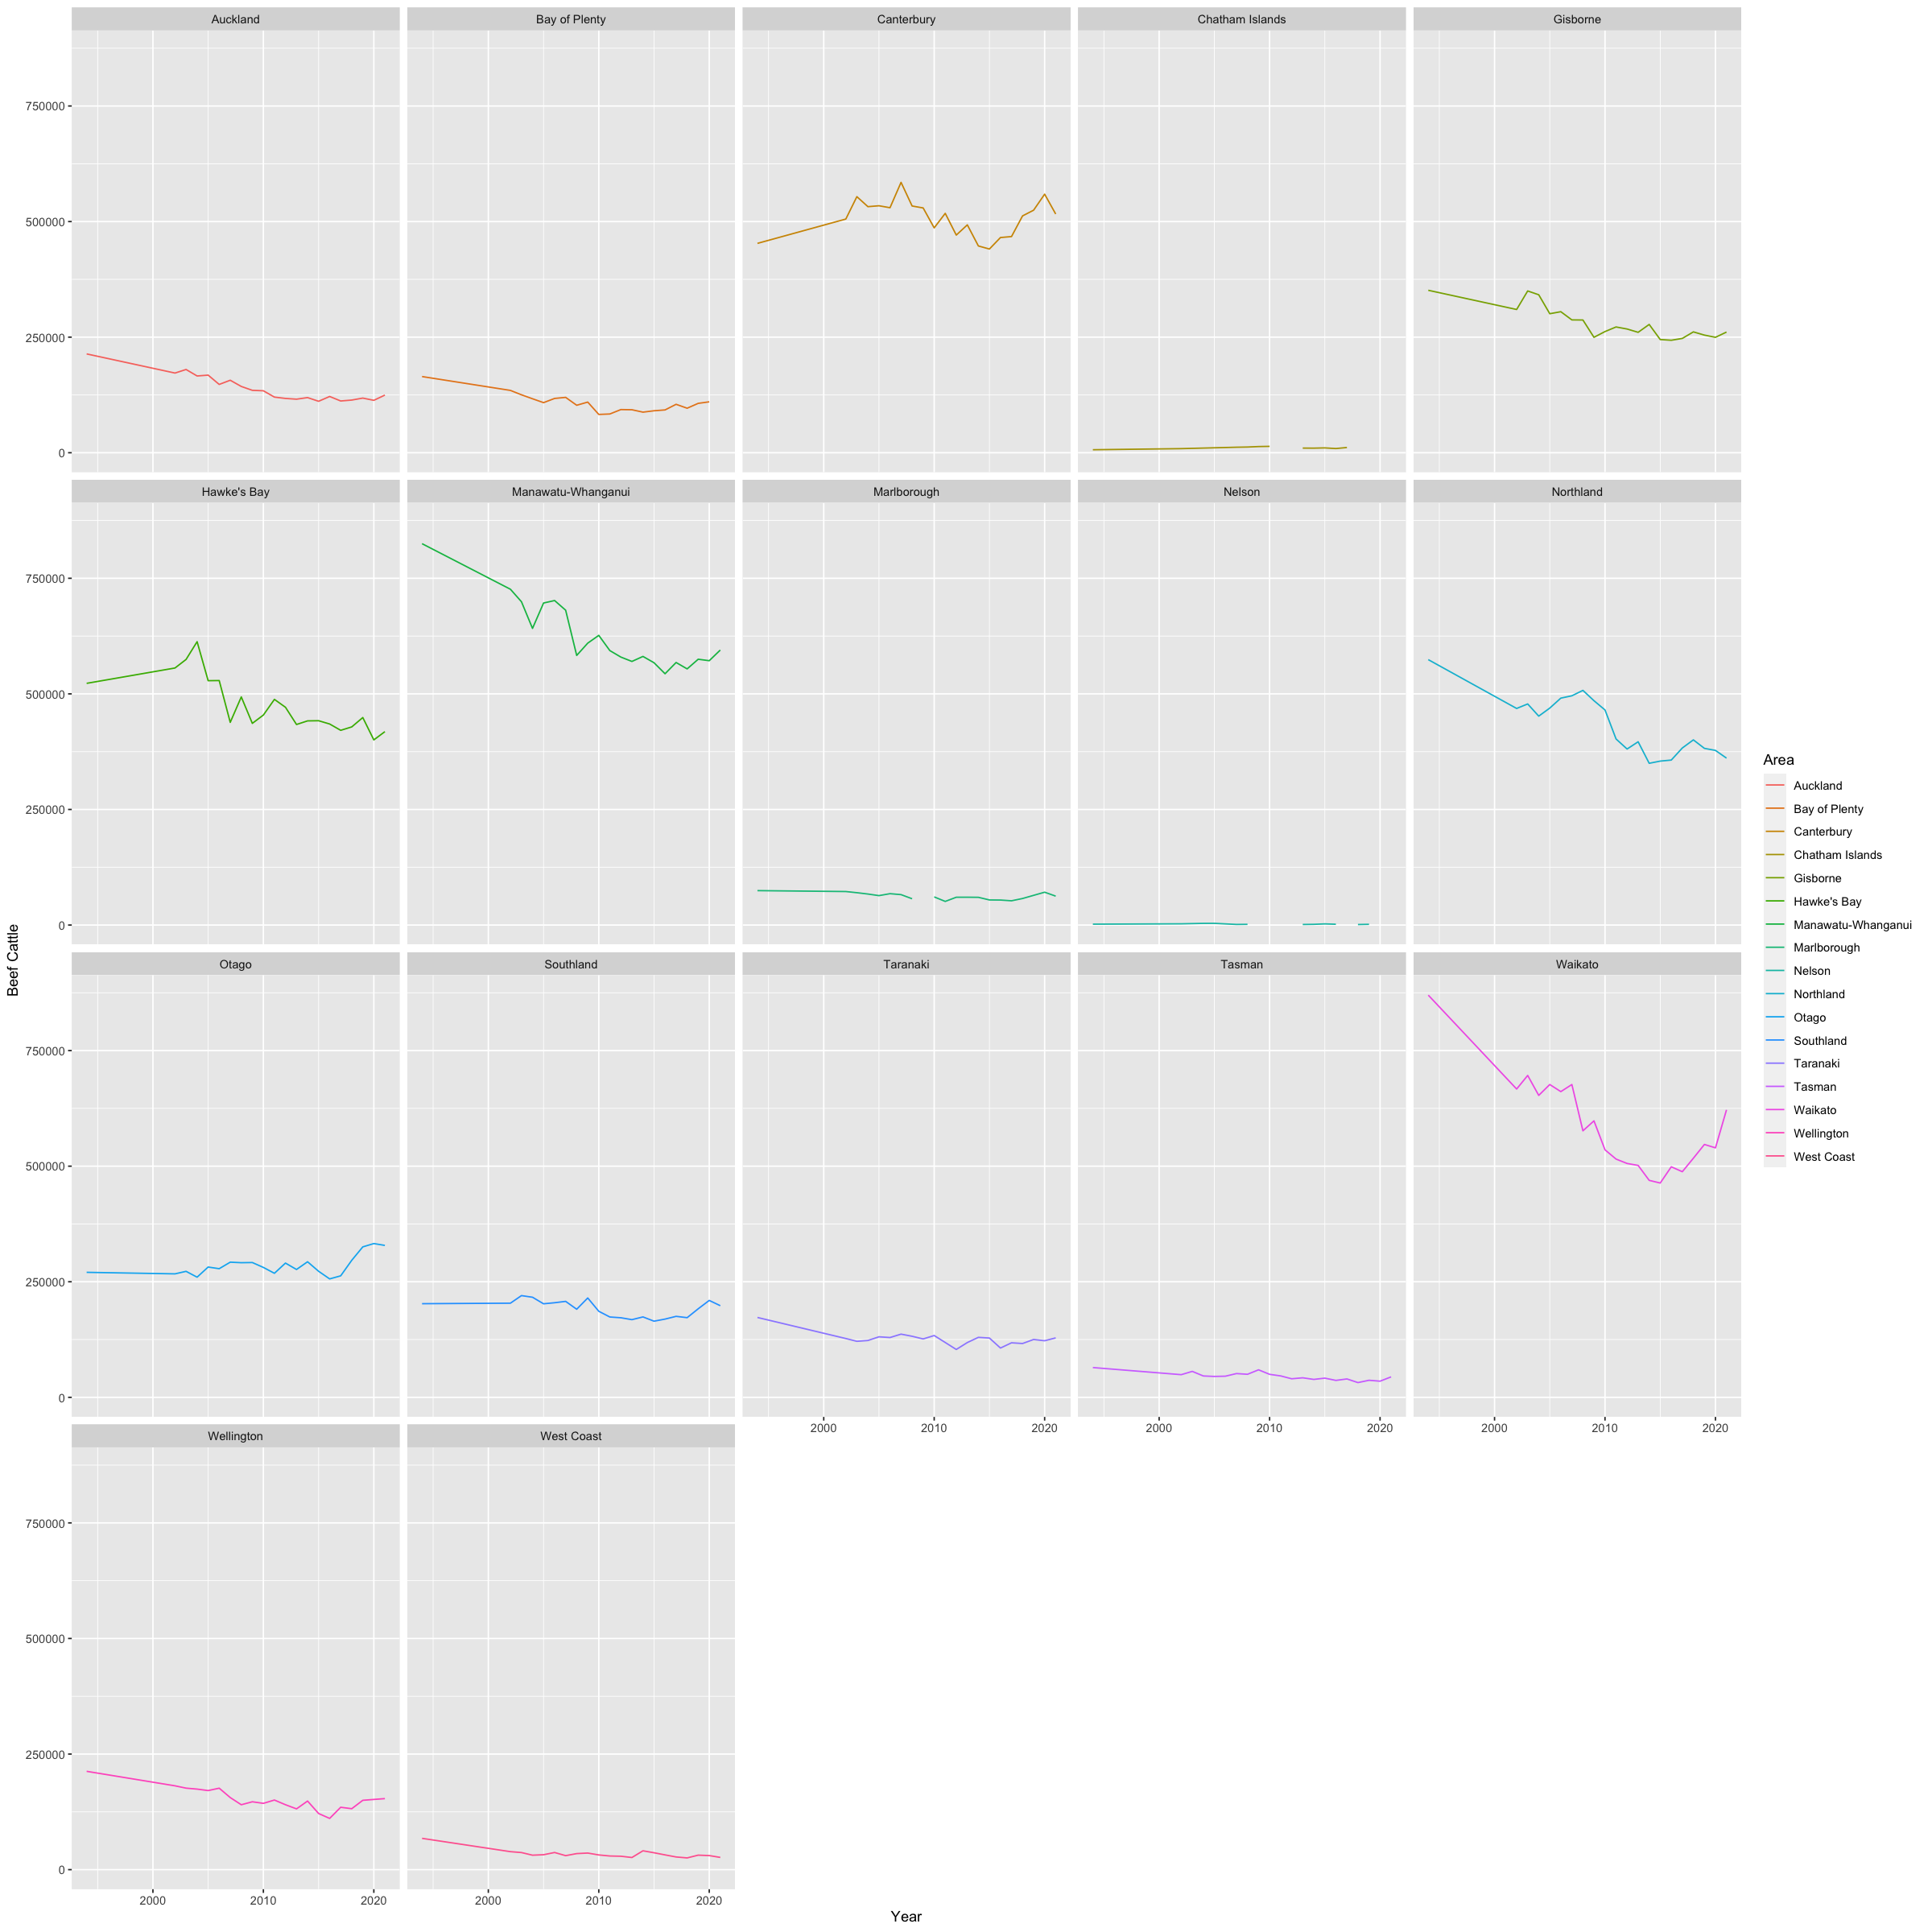

In [70]:
options(repr.plot.width=20, repr.plot.height=20)
activity_wide2 %>% 
    ggplot(aes(x = Year, y = `Beef Cattle`, colour = Area)) +
    geom_line() +
    facet_wrap(facets = vars(Area))

Warning message:
“Removed 4 rows containing missing values (position_stack).”


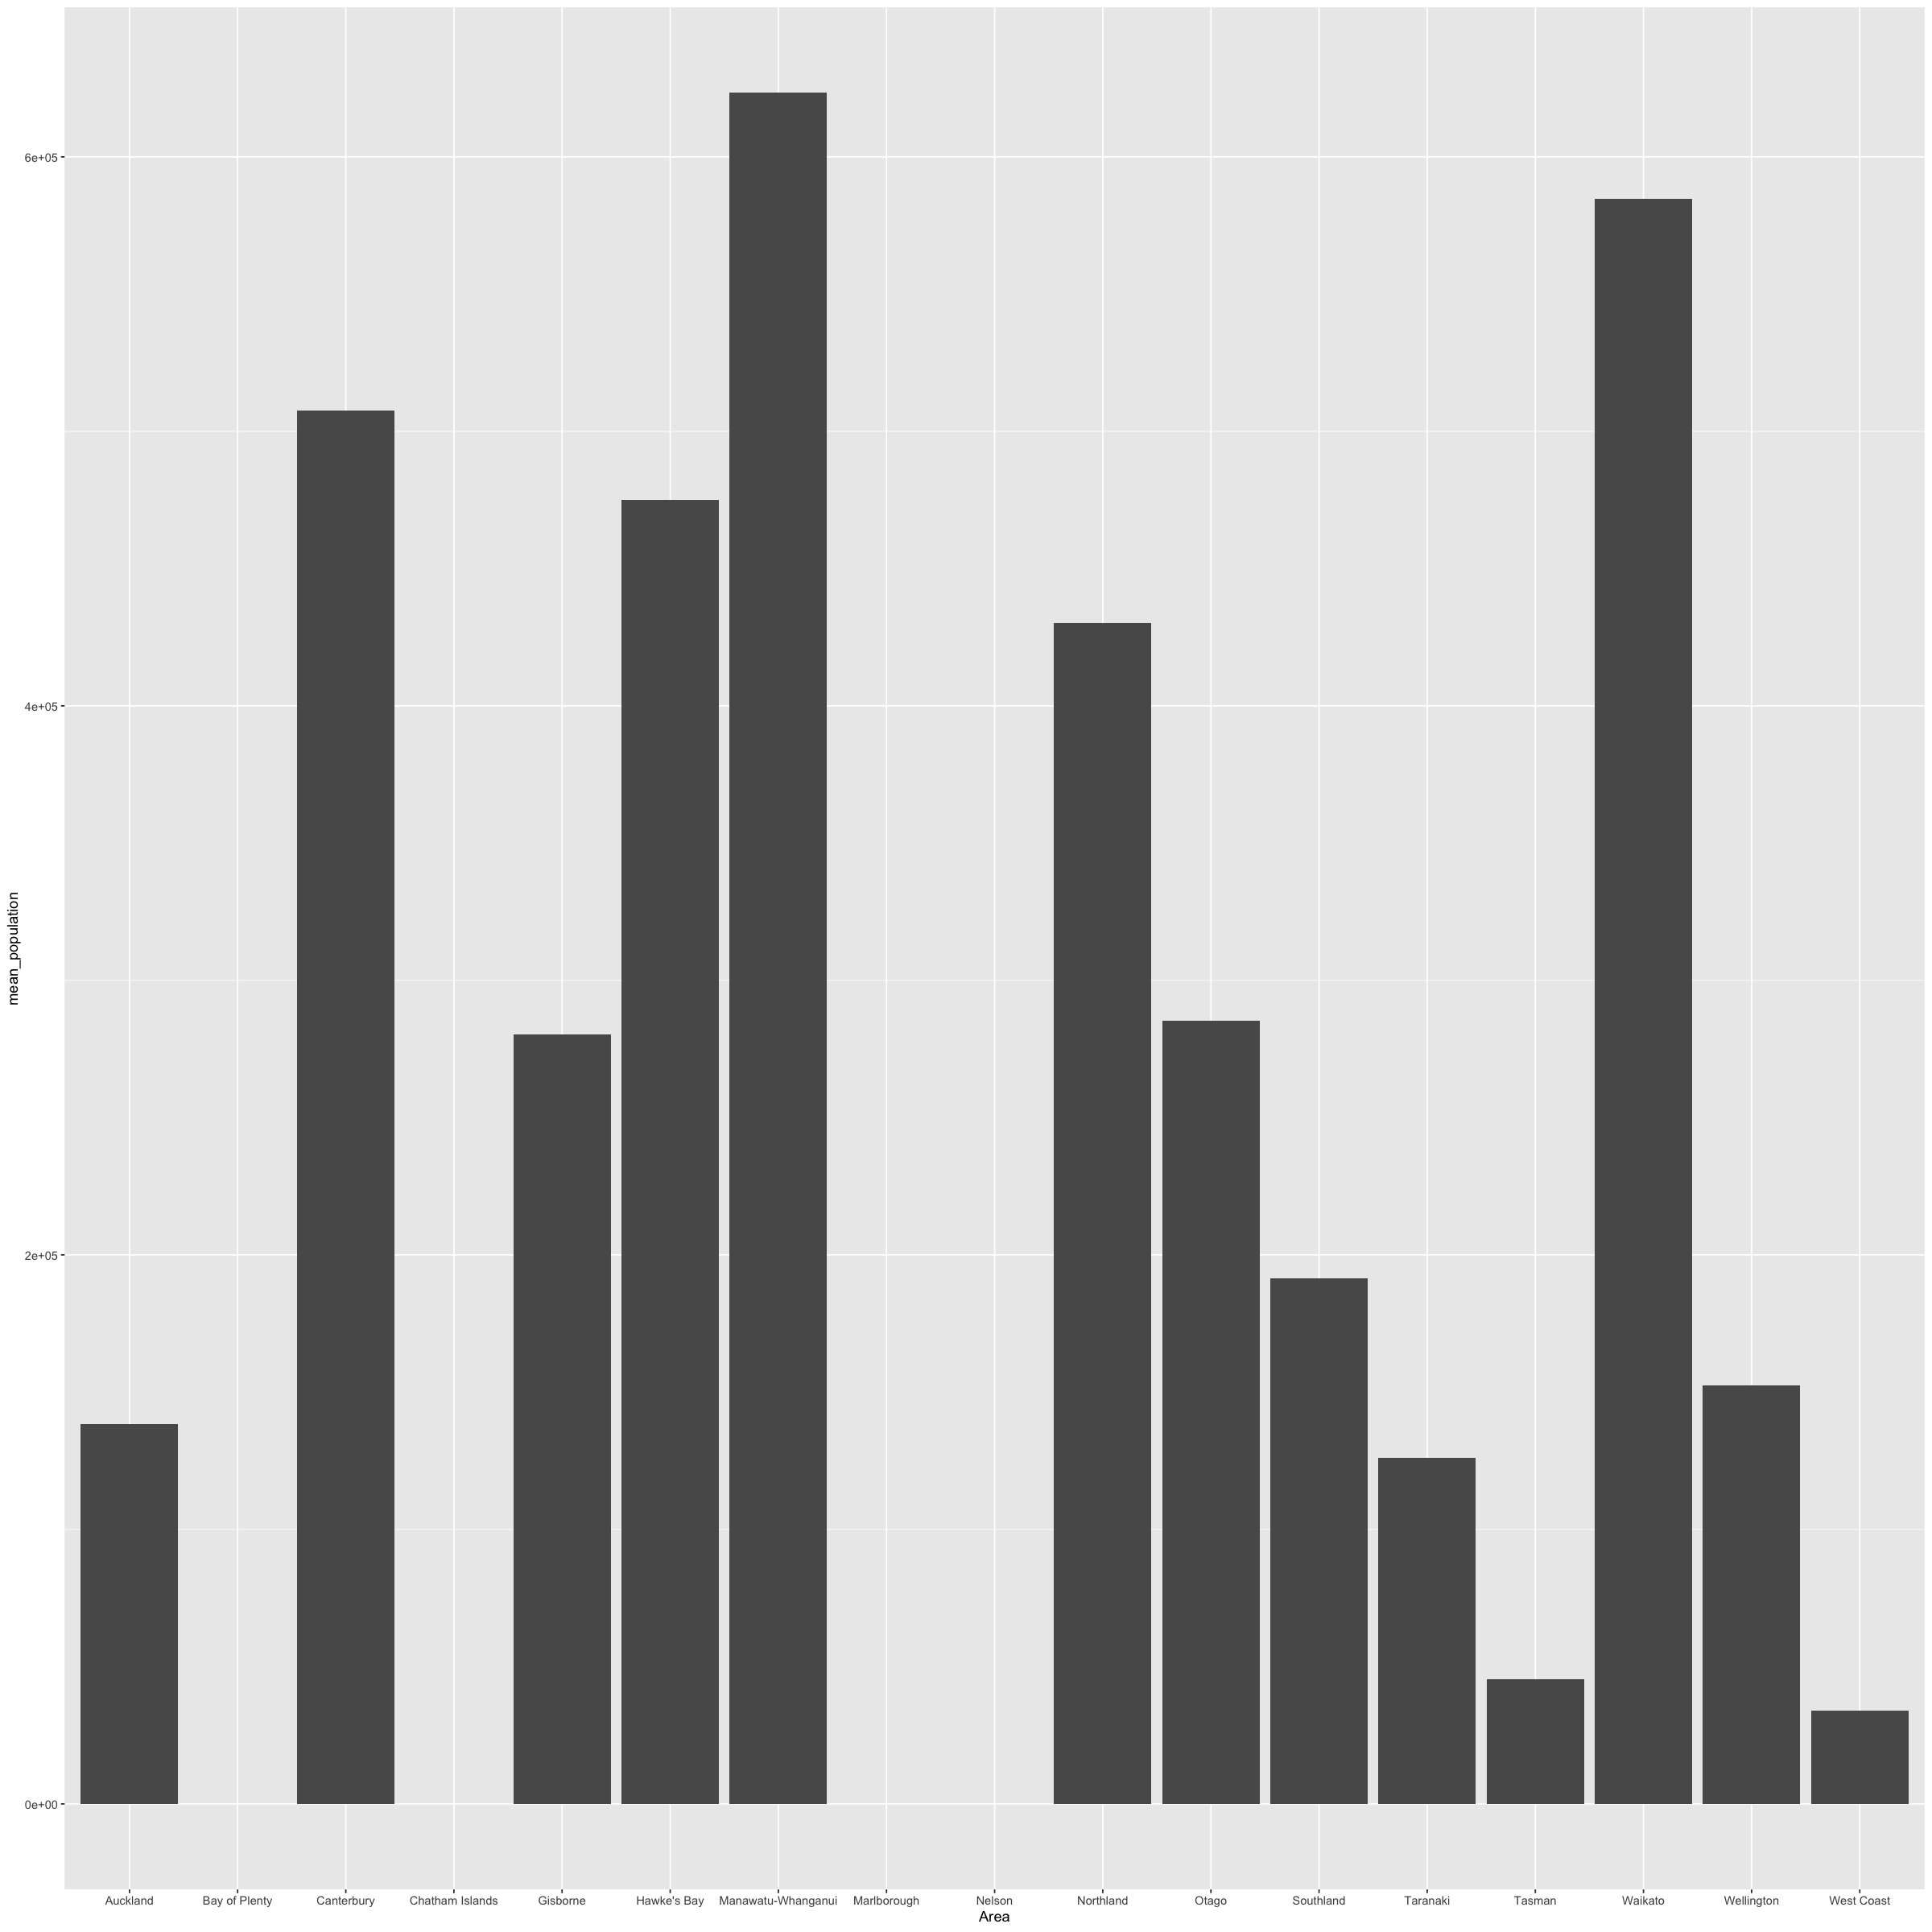

In [71]:
activity_wide2 %>% 
group_by(Area) %>% 
summarise(mean_population = mean(`Beef Cattle`)) %>% 
          ggplot(aes(
              x = Area, 
              y = mean_population
          ))+geom_bar(stat = 'identity')


In [72]:
library(highcharter)

dairy_pop_yearly

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



ERROR: Error in eval(expr, envir, enclos): object 'dairy_pop_yearly' not found
